<a href="https://colab.research.google.com/github/dheerajkumar1a1a/Kaggle_github/blob/main/potato_shimla_prophet_univ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'
import os
import plotly.io as pio
pio.renderers.default = 'colab'
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
parent_df={}
parent_df['RANCHI']=pd.read_csv('complete_data.csv',index_col=0,parse_dates=[0])

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# sns.lineplot(data=parent_df['RANCHI'])
parent_df['RANCHI'].iplot()

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
parent_df['RANCHI'].drop('2017-05-27',inplace=True)

In [ ]:
parent_df['RANCHI']

Arrival Quantity  Retail Prices  Min Price  Max Price  Modal Price
Date                                                                          
2002-01-01               NaN            NaN        NaN        NaN          NaN
2002-01-02               NaN            NaN        NaN        NaN          NaN
2002-01-03               NaN            NaN        NaN        NaN          NaN
2002-01-04              12.0            0.0      400.0      450.0        425.0
2002-01-05               NaN            NaN        NaN        NaN          NaN
...                      ...            ...        ...        ...          ...
2023-02-27               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN

[7532 rows x 5 columns]

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
df_Ranchi=parent_df['RANCHI'].copy()

In [ ]:
df_Ranchi.loc[:,'Retail Prices'][(df_Ranchi['Retail Prices']>4000) & (df_Ranchi['Retail Prices']<5000)].head(60)

Series([], Name: Retail Prices, dtype: float64)

In [ ]:
px.line(df_Ranchi,x=df_Ranchi.index,y=['Retail Prices'])

In [ ]:
df_Ranchi_1=df_Ranchi.copy()
df_Ranchi.isnull().sum()

Arrival Quantity    2218
Retail Prices       2218
Min Price           2218
Max Price           2218
Modal Price         2218
dtype: int64

In [ ]:
#source for removing rows with retail price > 4000 is listed below.
#https://www.ceicdata.com/en/india/retail-price-department-of-agriculture-and-cooperation-food-by-cities-potato/retail-price-doac-potato-himachal-pradesh-shimla
df_Ranchi_1=df_Ranchi_1[df_Ranchi_1['Retail Prices']<=4000]
df_Ranchi_1.isnull().sum()
# df_Ranchi['Retail Prices'].iplot()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
px.line(df_Ranchi_1,x=df_Ranchi_1.index,y=['Retail Prices'])

In [ ]:
df_Ranchi_1.describe()

Arrival Quantity  Retail Prices    Min Price     Max Price  Modal Price
count       5301.000000    5301.000000  5301.000000   5301.000000  5301.000000
mean          30.040747    1572.740238   960.950575   1090.870779  1024.596491
std           69.156169     756.775299   516.057327    612.916556   532.428153
min            0.000000       0.000000   200.000000     50.000000    52.000000
25%           20.000000    1000.000000   550.000000    650.000000   600.000000
50%           27.000000    1500.000000   900.000000   1000.000000   950.000000
75%           35.000000    2000.000000  1200.000000   1400.000000  1300.000000
max         2300.000000    4000.000000  6500.000000  20000.000000  5550.000000

In [ ]:
df_Ranchi=df_Ranchi['2007':'2020'].copy()


In [ ]:
df_Ranchi_1=df_Ranchi_1['2007':'2020'].copy()
df_Ranchi_1.isnull().sum()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi.iplot()

In [ ]:
df_Ranchi_dropped=df_Ranchi_1.dropna()

In [ ]:
df_Ranchi_dropped['Arrival Quantity']['2020'].iplot()

In [ ]:
df_Ranchi_dropped.iplot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

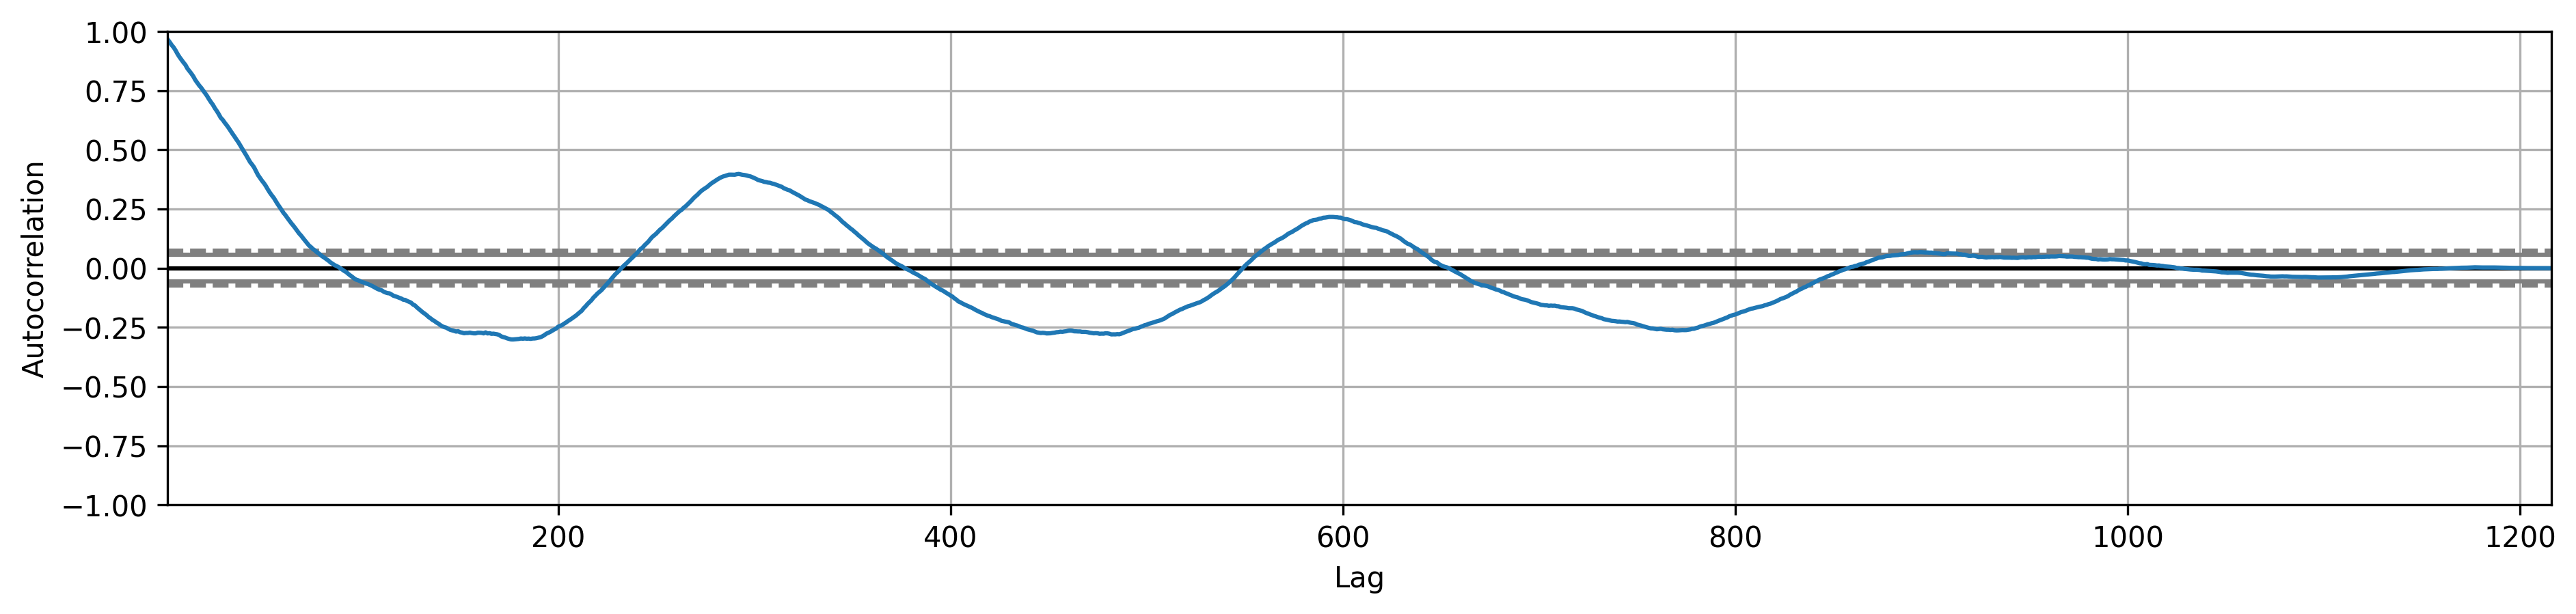

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Arrival Quantity'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

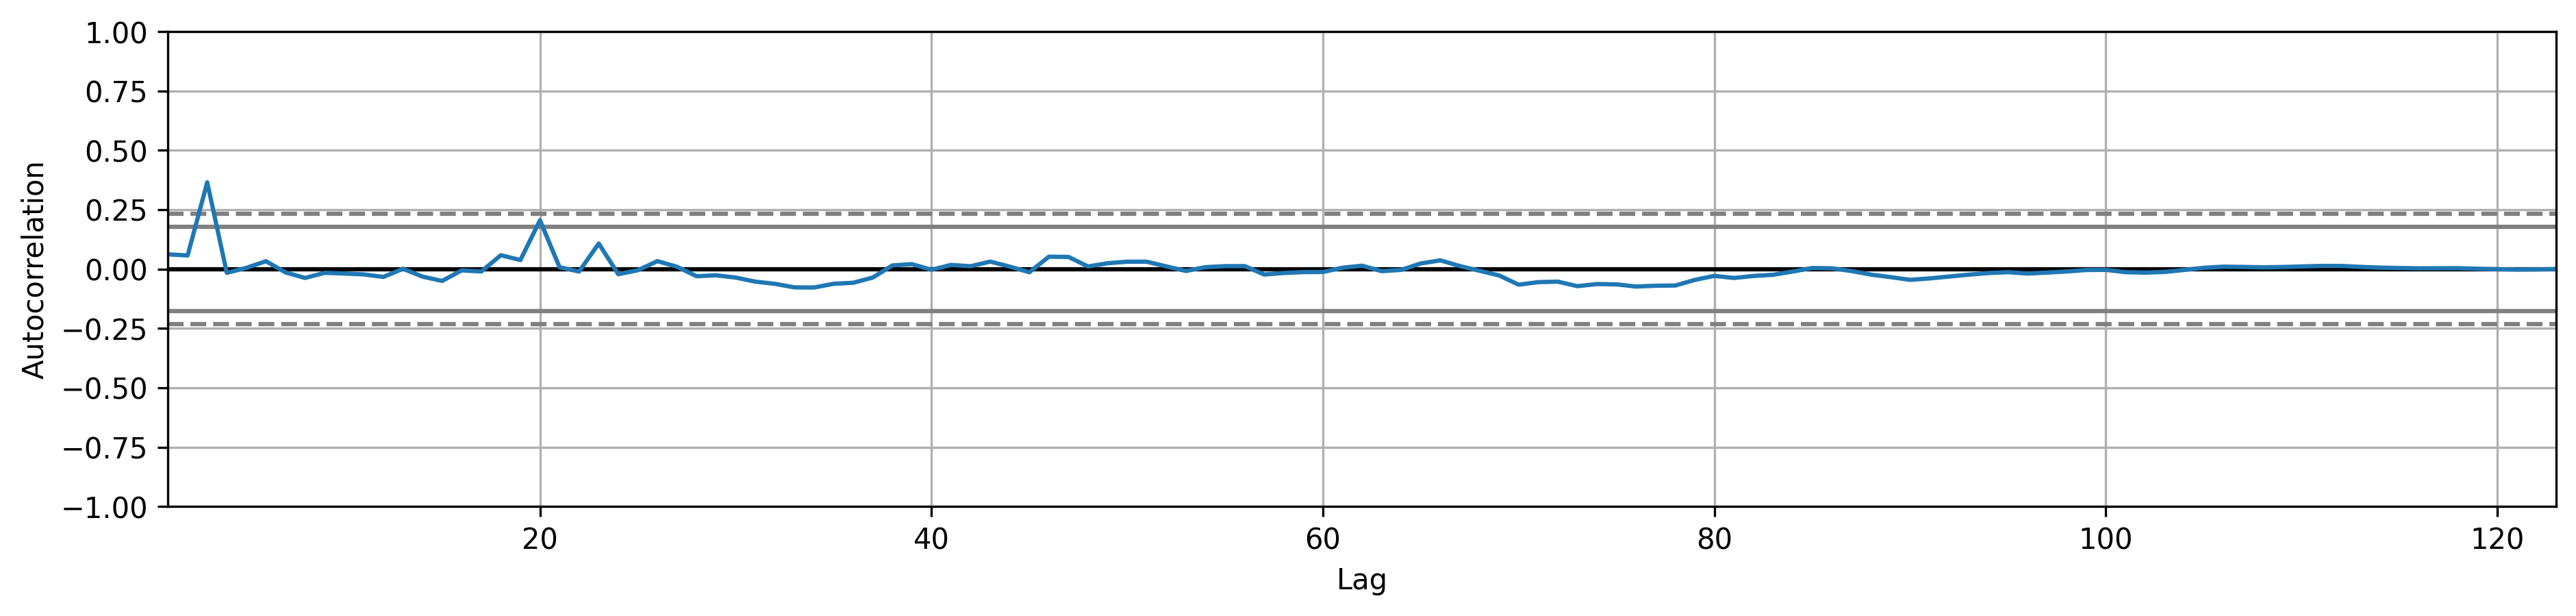

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2010':'2020']['Arrival Quantity'].resample('1m').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

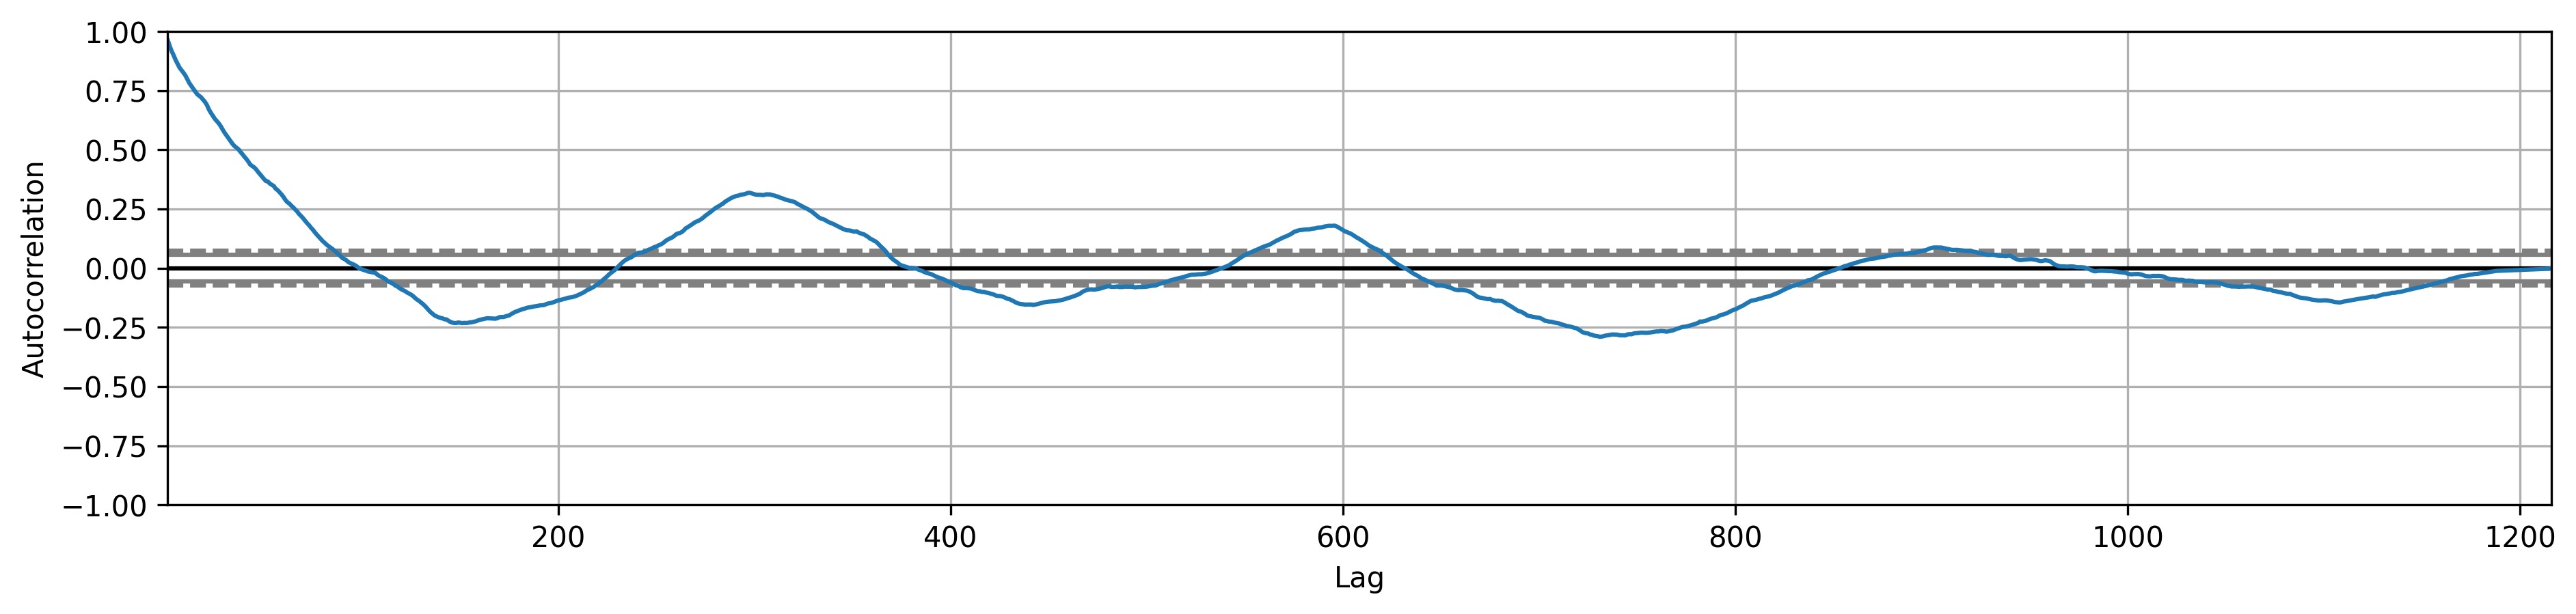

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

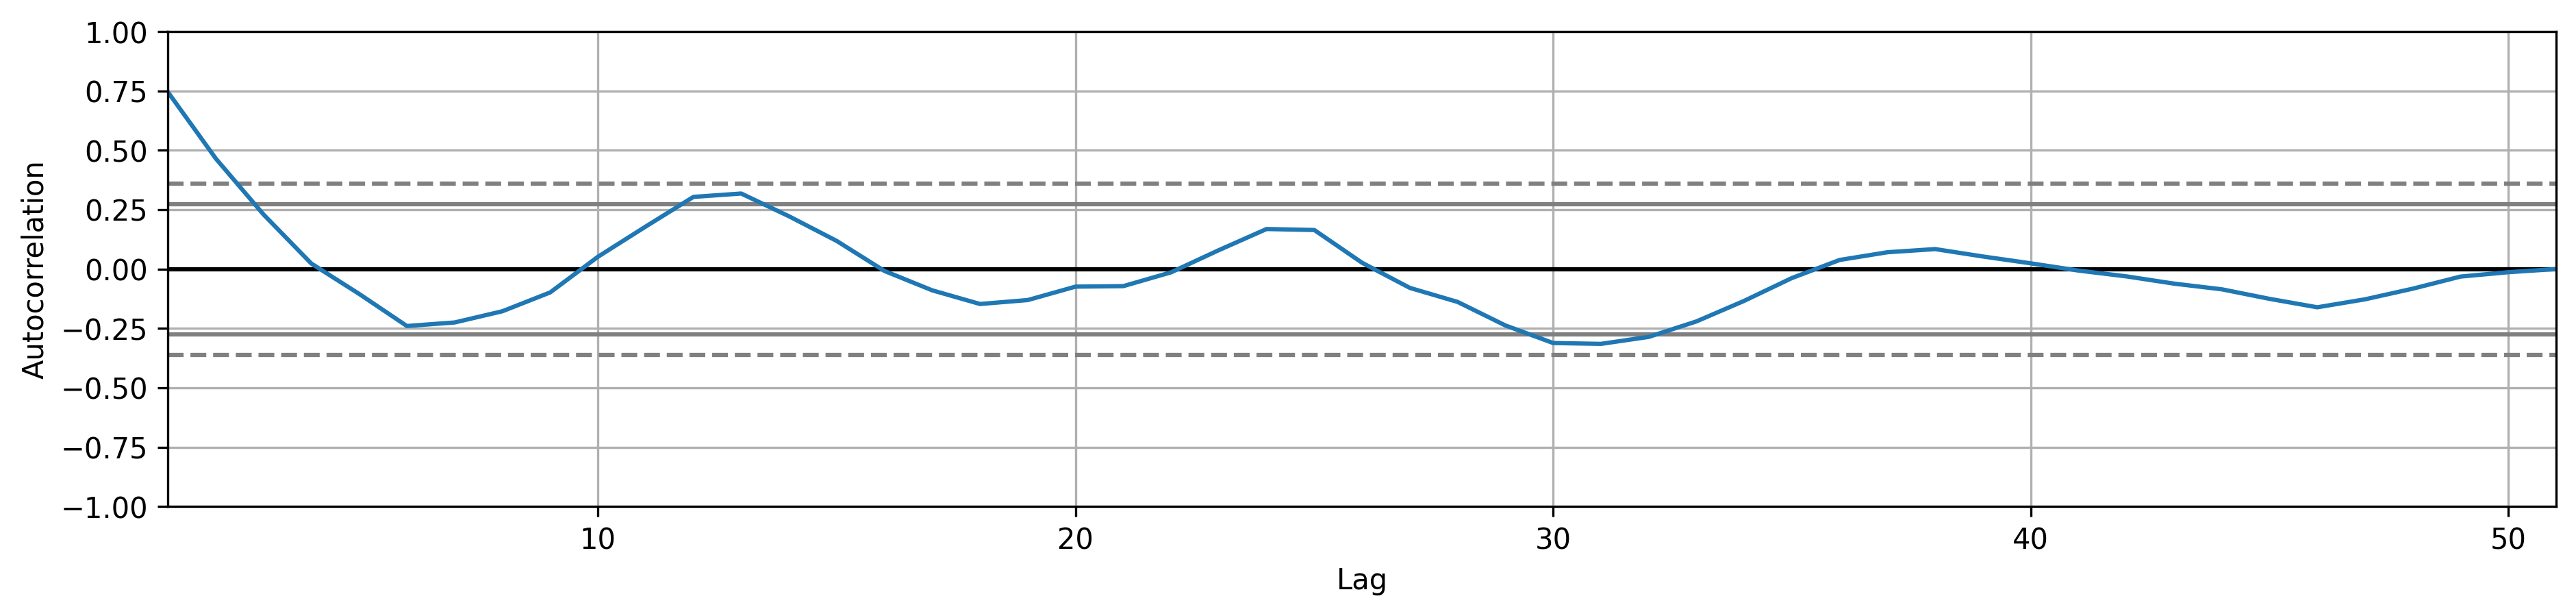

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'].resample('1m').mean())

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

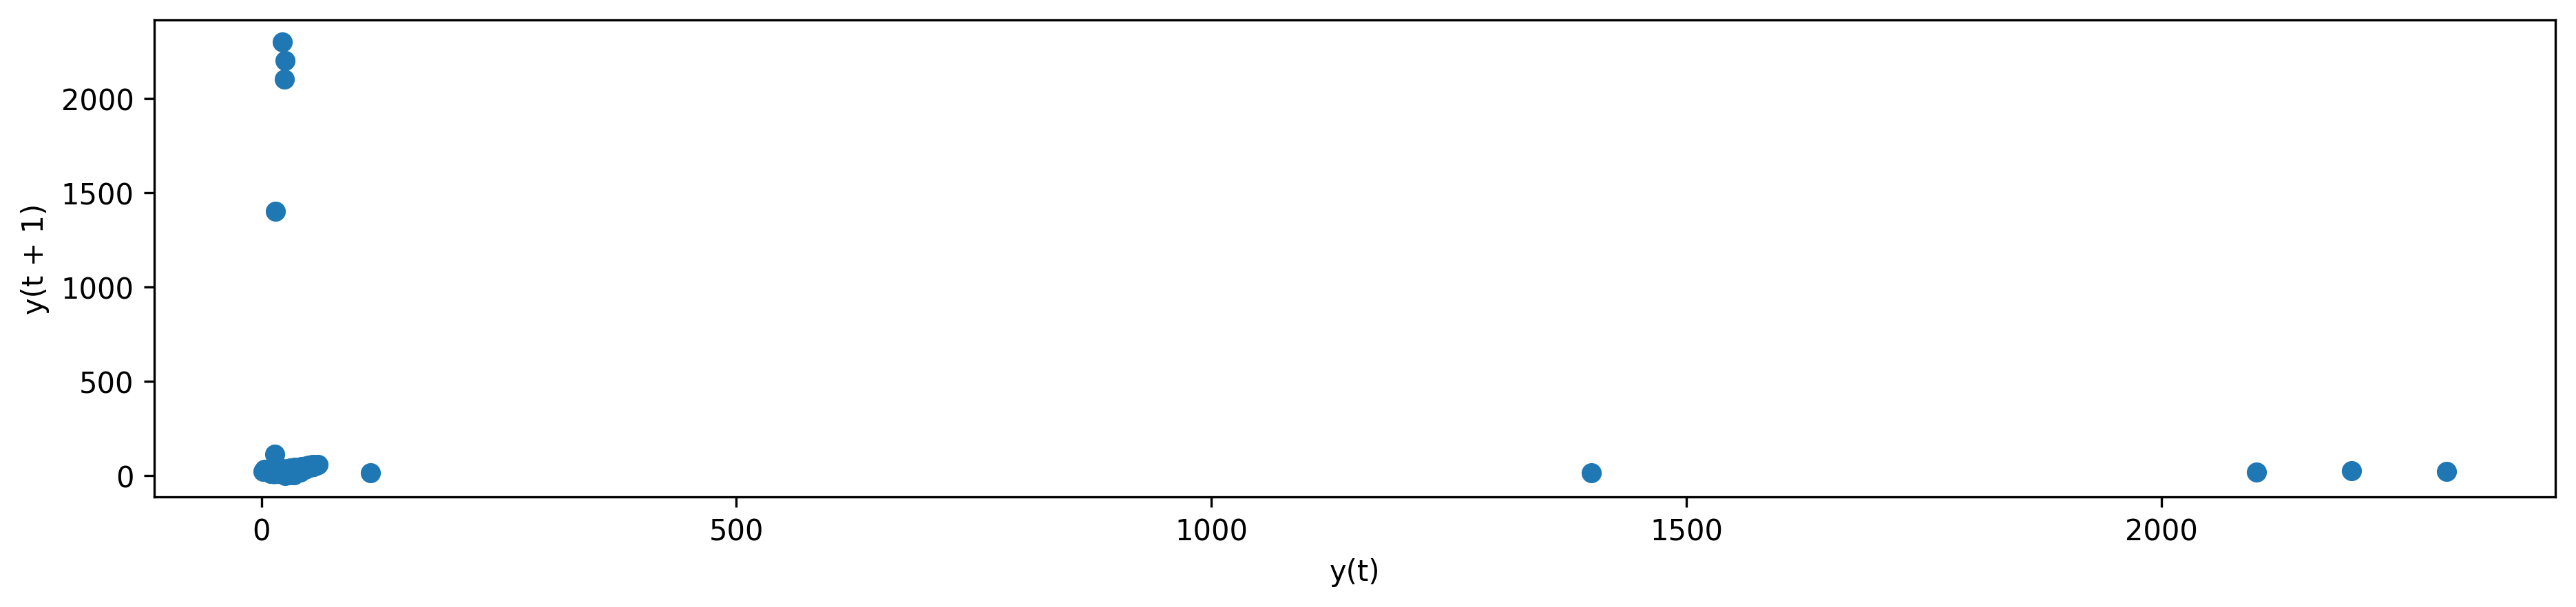

In [ ]:
pd.plotting.lag_plot(df_Ranchi_1['Arrival Quantity'],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

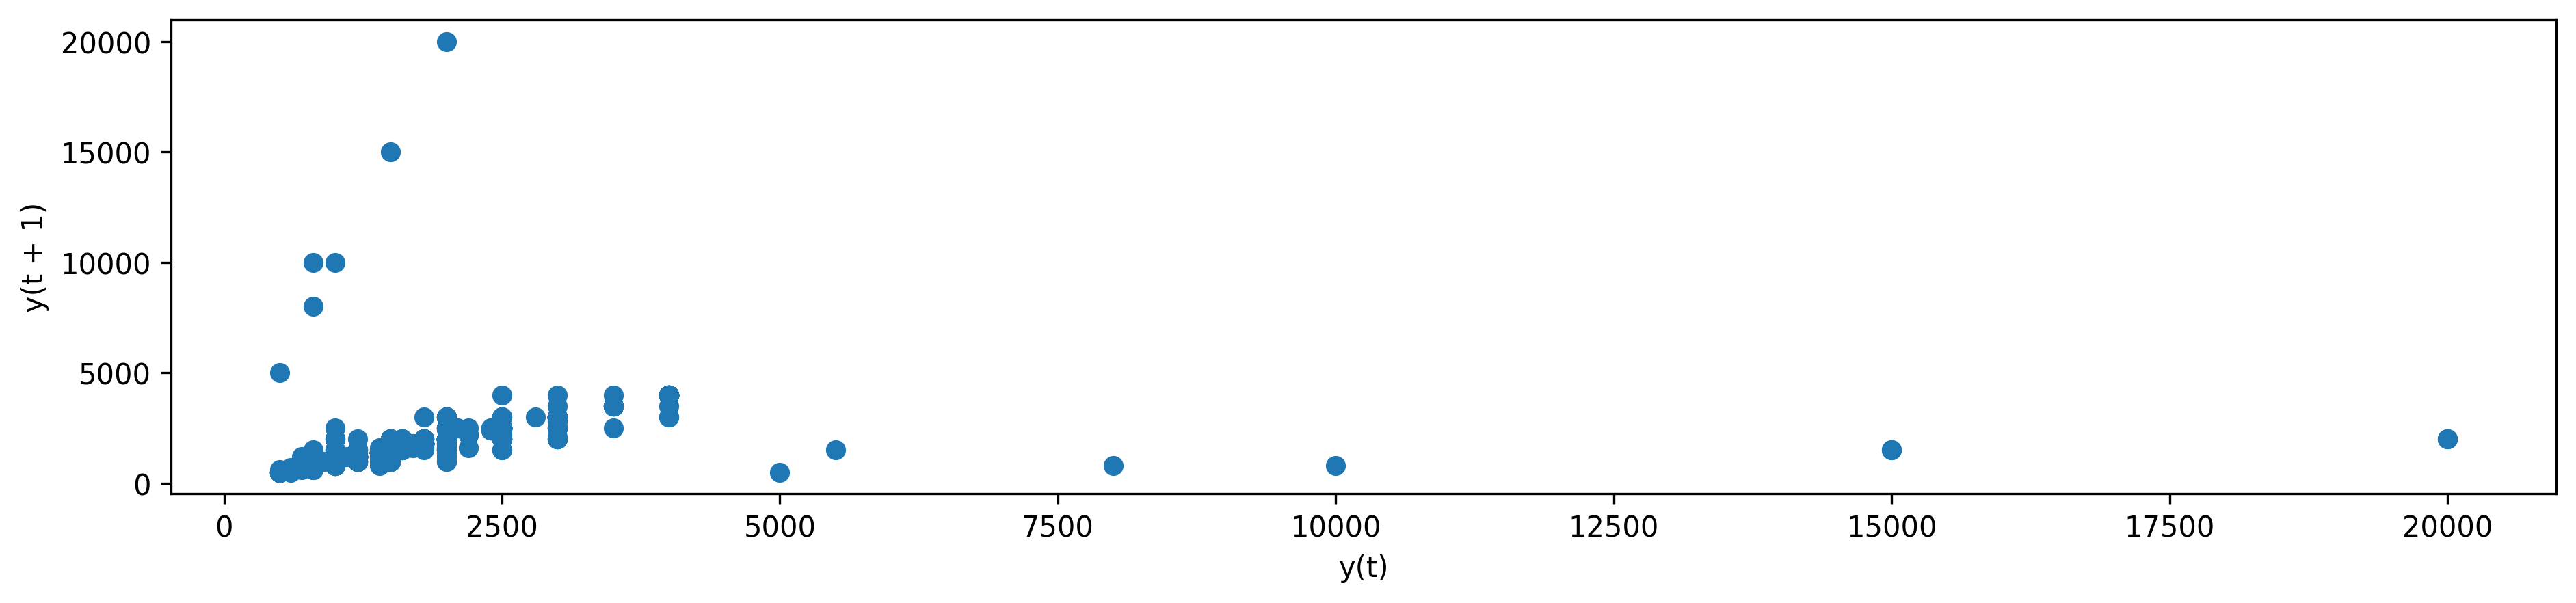

In [ ]:
pd.plotting.lag_plot(df_Ranchi['Retail Prices'],lag=1)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# In[19]:


test_result=adfuller(df_Ranchi_dropped['Arrival Quantity'])


# In[20]:


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_Ranchi_dropped['Arrival Quantity'])

ADF Test Statistic : -11.492552357489792
p-value : 4.697878906447551e-21
#Lags Used : 19
Number of Observations Used : 3652
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_Ranchi_dropped['Retail Prices'])

ADF Test Statistic : -4.148140065834546
p-value : 0.0008055151766376697
#Lags Used : 13
Number of Observations Used : 3658
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_Ranchi['Retail Prices']=df_Ranchi['Retail Prices'].fillna(-1)

In [ ]:
df_Ranchi.isnull().sum()

Arrival Quantity    1245
Retail Prices          0
Min Price           1245
Max Price           1245
Modal Price         1245
dtype: int64

In [ ]:
df_Ranchi=df_Ranchi[(df_Ranchi['Retail Prices']<=4000)]

In [ ]:
df_Ranchi['Retail Prices'].iplot()

In [ ]:
df_Ranchi.replace(-1,np.nan,inplace=True)

In [ ]:
df_Ranchi.isnull().sum()

Arrival Quantity    1245
Retail Prices       1245
Min Price           1245
Max Price           1245
Modal Price         1245
dtype: int64

In [ ]:
df_Ranchi_imp=pd.DataFrame()
df_Ranchi_imp['Retail Prices']=df_Ranchi['Retail Prices'].rolling(window=13,min_periods=6).mean().fillna(method='ffill')
df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=19,min_periods=9).mean().fillna(method='ffill')
df_Ranchi_imp['Retail Prices_lag']=df_Ranchi['Retail Prices'].rolling(window=13,min_periods=6).mean().fillna(method='ffill').shift(3)
# df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='bfill')
df_Ranchi_imp=df_Ranchi_imp.dropna()
#df_Ranchi_imp['2008':'2016']['Retail Prices'].plot()
df_Ranchi_imp[['Retail Prices','Retail Prices_lag']].iplot()
df_Ranchi_imp.isnull().sum()

Retail Prices        0
Arrival Quantity     0
Retail Prices_lag    0
dtype: int64

In [ ]:
df_Ranchi_imp_month=pd.DataFrame()
df_Ranchi_imp_month['Retail Prices_lag']=df_Ranchi_imp['Retail Prices_lag'].resample('M').mean()
df_Ranchi_imp_month['Arrival Quantity']=df_Ranchi_imp['Arrival Quantity'].resample('M').max()
df_Ranchi_imp_month['Arrival Quantity_mean']=df_Ranchi_imp['Arrival Quantity'].resample('M').sum()
df_Ranchi_imp_month=df_Ranchi_imp_month.dropna()
df_Ranchi_imp_month.index = df_Ranchi_imp_month.index + pd.offsets.MonthBegin(0)
df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].tail(6)

Arrival Quantity  Retail Prices_lag
Date                                           
2019-11-01         27.062500        2135.153959
2019-12-01         27.933333        2737.365591
2020-01-01         31.000000        3000.000000
2020-02-01         34.500000        3006.561448
2020-03-01         40.000000        2376.304714
2020-04-01         40.571429        2050.972862

In [ ]:
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
finaldf1['ds'] = pd.to_datetime(finaldf1.index)
finaldf1.reset_index(drop=True,inplace=True)
#addition of new line to make sure that it doesnt involve covid effects
finaldf1=finaldf1.iloc[:-2,:]
#done
finaldf1.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf1.tail()

Arrival Quantity_mean            y         ds
152             764.845238  2530.000000 2019-10-01
153             780.264515  2135.153959 2019-11-01
154             803.155147  2737.365591 2019-12-01
155             850.850000  3000.000000 2020-01-01
156             969.248397  3006.561448 2020-02-01

In [ ]:
finaldf=df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].copy()
finaldf['ds'] = pd.to_datetime(finaldf.index)
finaldf.reset_index(drop=True,inplace=True)
#addition of new line to make sure that it doesnt involve covid effects
finaldf=finaldf.iloc[:-2,:]
#done
finaldf.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf.tail()

Arrival Quantity            y         ds
152         26.857143  2530.000000 2019-10-01
153         27.062500  2135.153959 2019-11-01
154         27.933333  2737.365591 2019-12-01
155         31.000000  3000.000000 2020-01-01
156         34.500000  3006.561448 2020-02-01

In [ ]:
finaldf.isnull().sum()

Arrival Quantity    0
y                   0
ds                  0
dtype: int64

In [ ]:
finaldf1.corr()

<ipython-input-177-29b5b127a9ac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity_mean         y
Arrival Quantity_mean               1.000000  0.036174
y                                   0.036174  1.000000

In [ ]:
finaldf.corr()

<ipython-input-178-fbcde4b1202f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity         y
Arrival Quantity          1.000000  0.112488
y                         0.112488  1.000000

In [ ]:
#finaldf=finaldf1

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

#from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go
from plotly.subplots import make_subplots


import itertools

In [ ]:
# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)

prophetColumns =['Arrival Quantity']
# model

model = Prophet()

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/evdgokhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/zzpja_5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55202', 'data', 'file=/tmp/tmp3l0p76h9/evdgokhc.json', 'init=/tmp/tmp3l0p76h9/zzpja_5i.json', 'output', 'file=/tmp/tmp3l0p76h9/prophet_modelmz_u57pq/prophet_model-20230711160954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


125
(125, 3)
(32, 3)


MAE: 401.008
MAPE: 0.1927669991403994


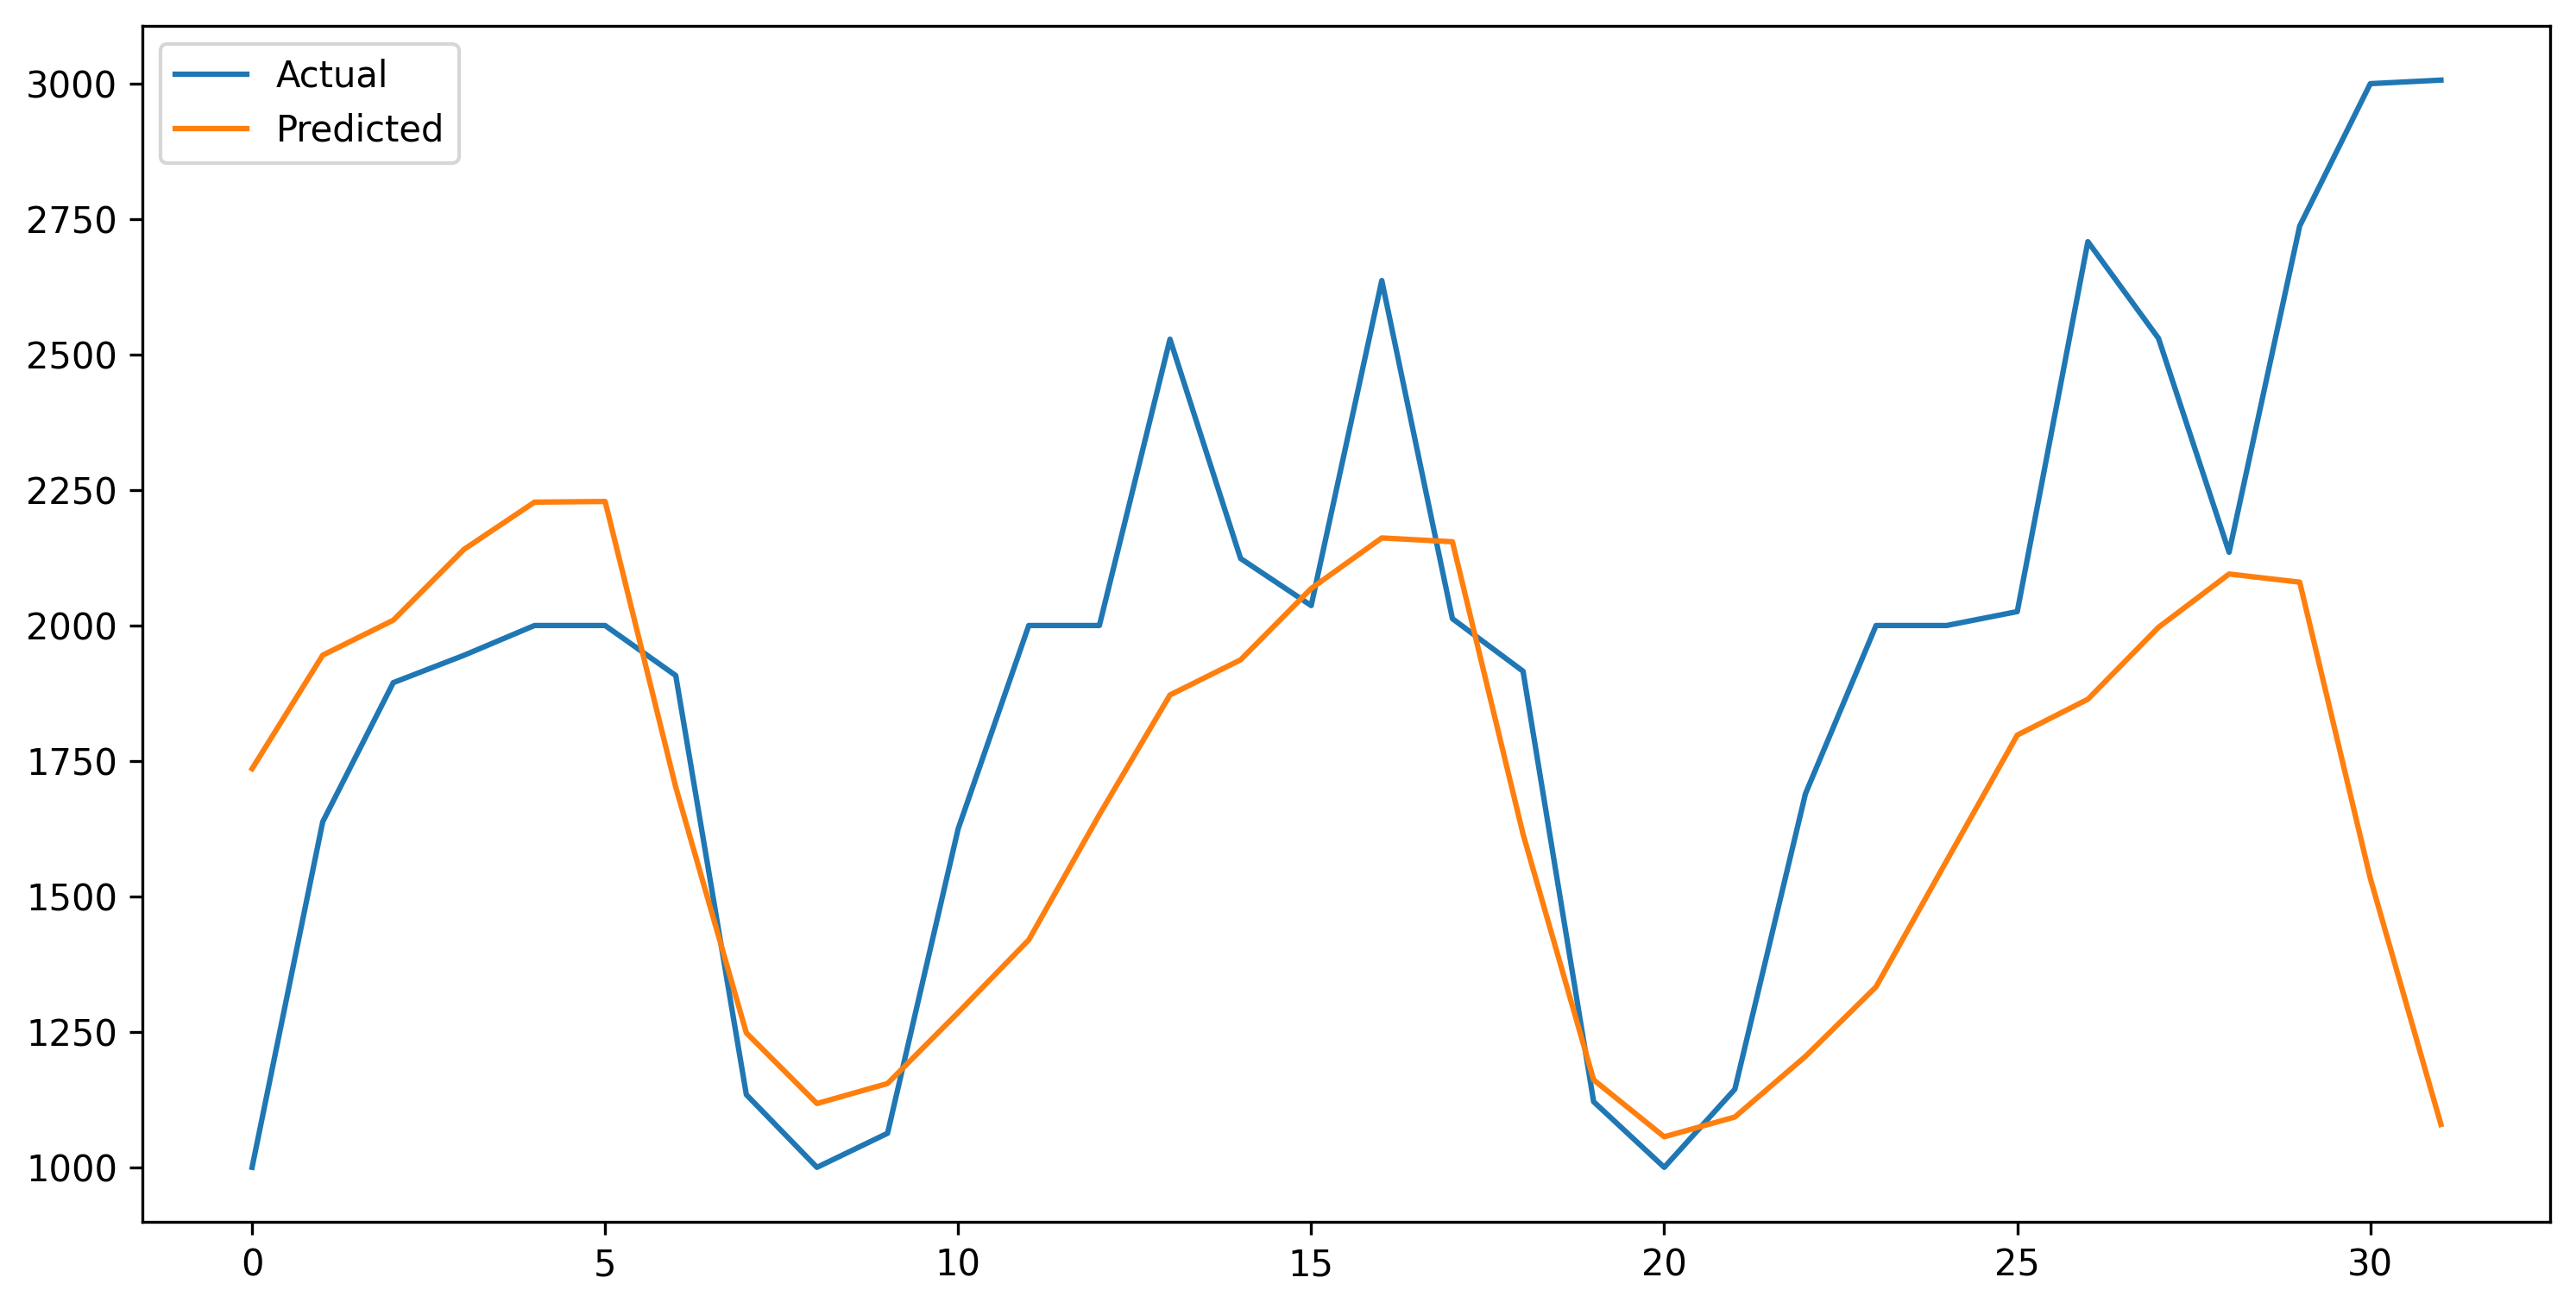

In [ ]:
y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(12, 6))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


125
(125, 3)
(32, 3)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/o36mmdo3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/iqkv2it0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55125', 'data', 'file=/tmp/tmp3l0p76h9/o36mmdo3.json', 'init=/tmp/tmp3l0p76h9/iqkv2it0.json', 'output', 'file=/tmp/tmp3l0p76h9/prophet_model5f0d3dgc/prophet_model-20230711160955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 898.126
MAPE: 0.4496902287074026


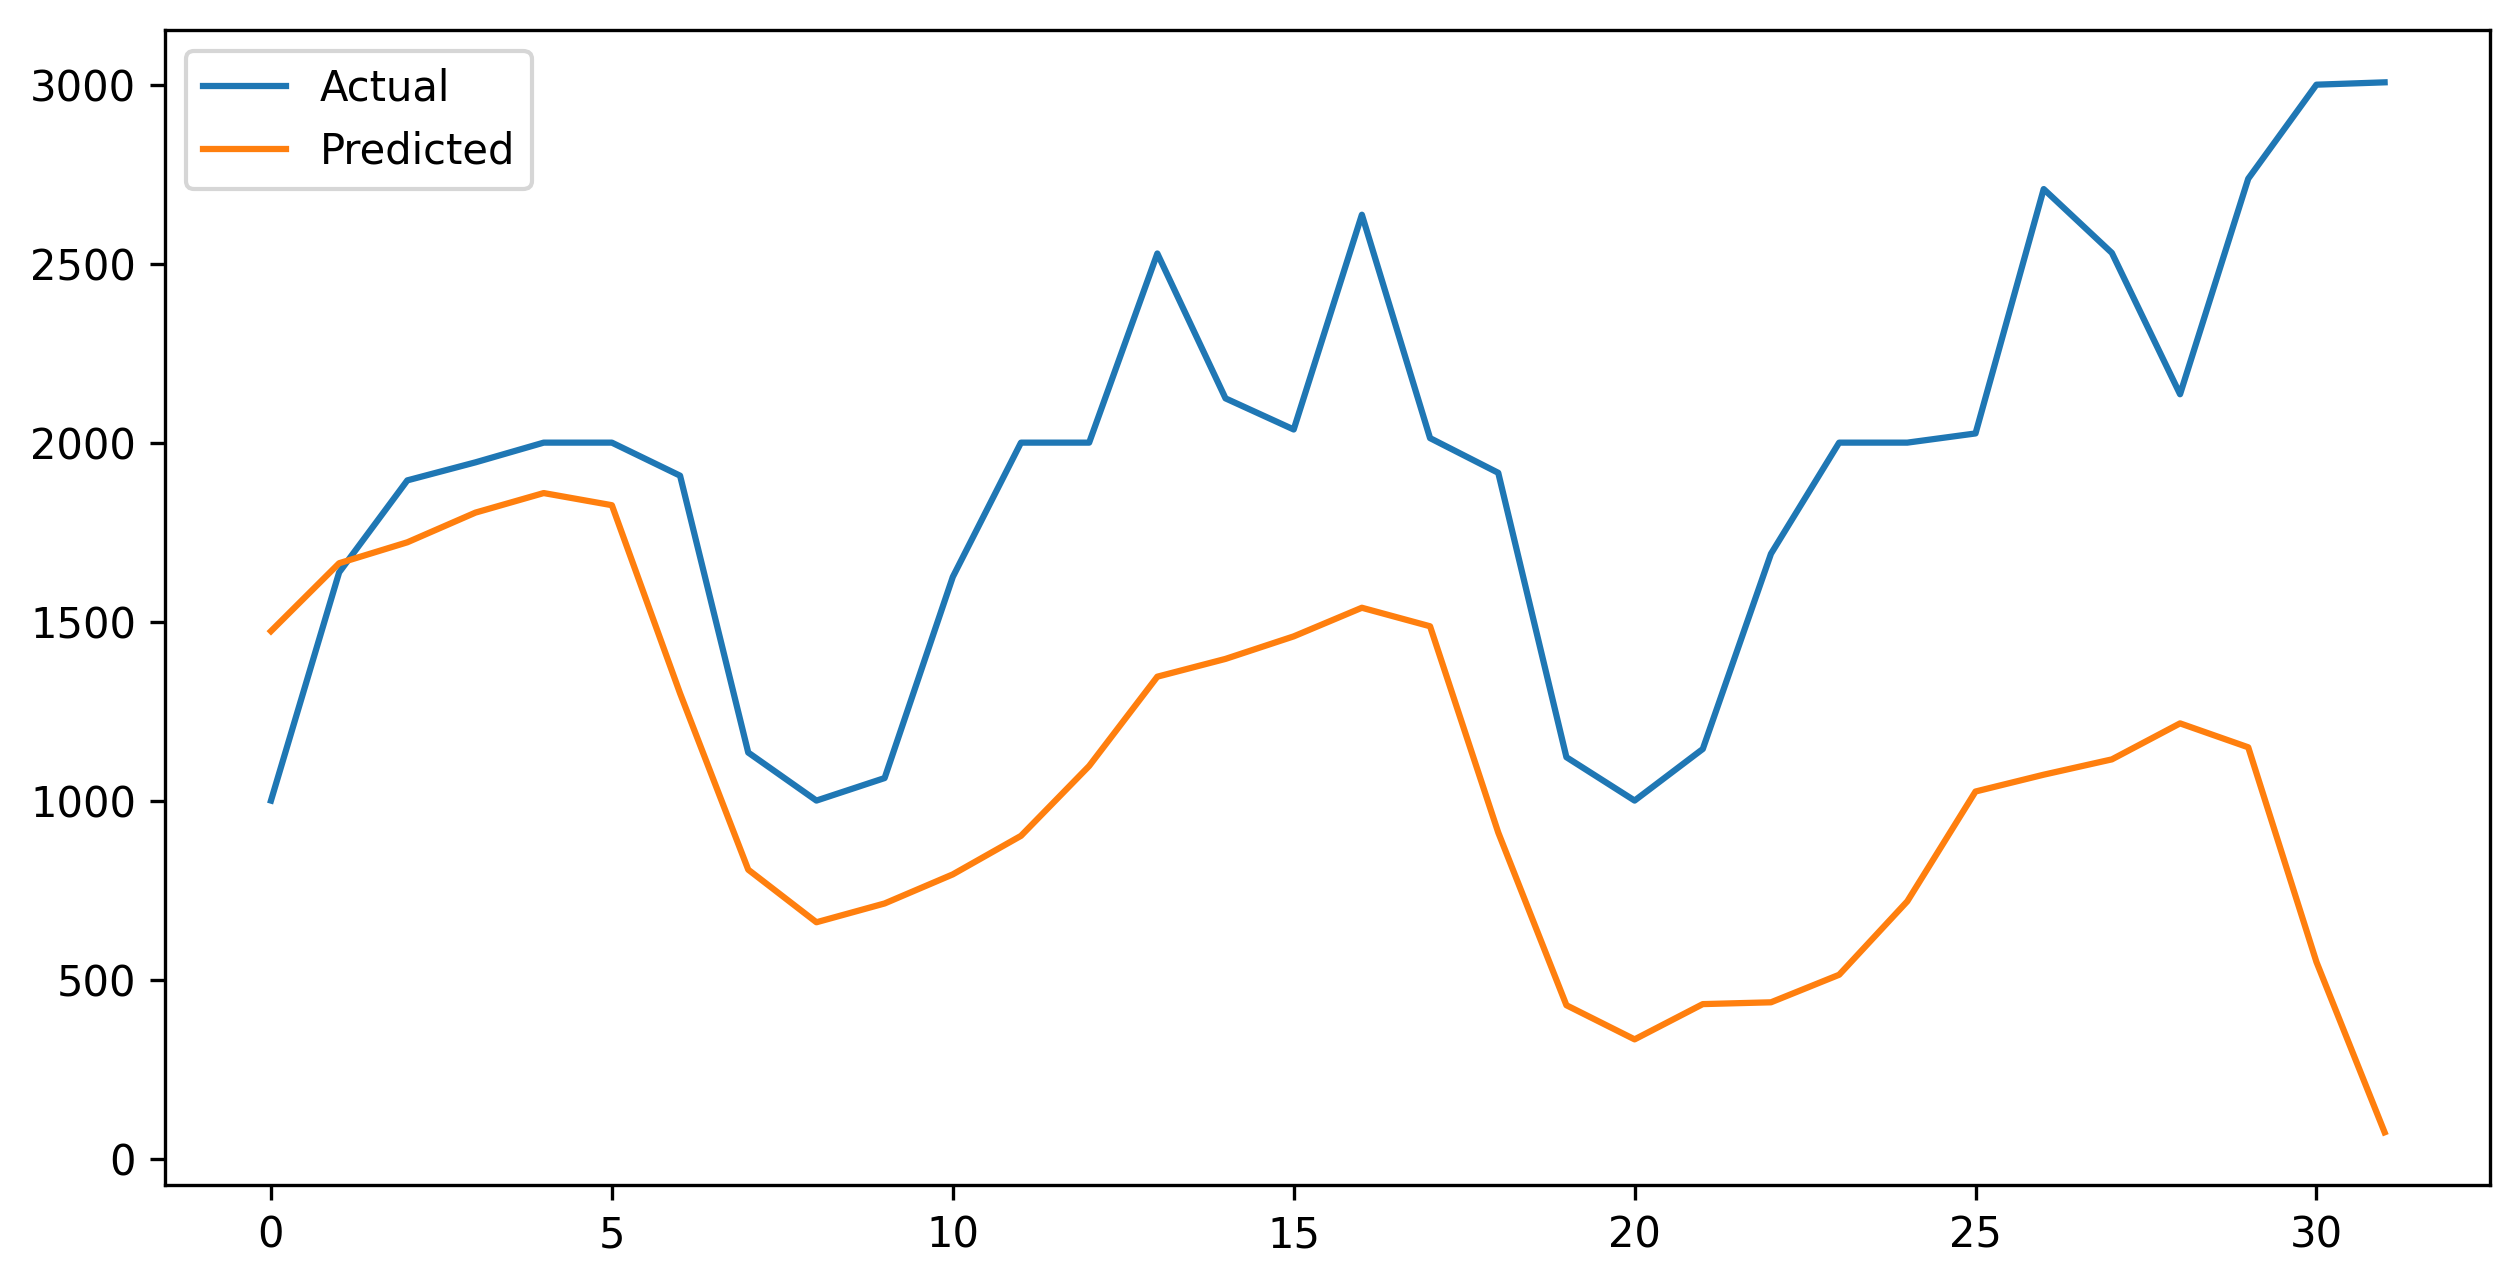

In [ ]:
#Trial 2

# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)
prophetColumns =['Arrival Quantity']
# model

#seasonality_mode = 'multiplicative'

#modelWeekly = Prophet(changepoint_range=0.90,changepoint_prior_scale = 0.5)

model = Prophet(changepoint_range=0.95,changepoint_prior_scale = 1,)#seasonality_prior_scale=20)

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(10, 5))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# with extreme weather and 80% train data, seasonality mode mulitplicative
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [ ]:
x=finaldf1.shape[0]
a=int(x*0.95)
b=int(x*0.05)
b=-b
b

-7

In [ ]:

def model_prophet(Prophetdf,n_obs=a+1):
    Prophetdf_train=Prophetdf[0:n_obs]
    Prophetdf_test =Prophetdf[n_obs:]
    multi_model = Prophet(interval_width = 0.95)
    Prophet_cols = Prophetdf.columns.tolist()
    Prophet_cols.remove('ds')
    Prophet_cols.remove('y')
    print(Prophetdf_train.columns)
    #print(Prophetdf_test[['ds','y']])

    # adding all columns in add regressor
    for col in Prophet_cols:
        multi_model.add_regressor(col)


    multi_model.fit(Prophetdf_train)
    print('Prophetdf_test.shape[0]')
    print(Prophetdf_test.shape[0])
    # make furture frame
    future = multi_model.make_future_dataframe(periods = Prophetdf_test.shape[0],freq='MS', include_history=True)
    for col in Prophet_cols:
        future[col] =Prophetdf[col]
    print(Prophetdf_test[['ds','y']])
    print('future')
    print(future)

    # predict future
    forecastProphet =  multi_model.predict(future)
    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

    print(forecastProphet[['ds','yhat', 'yhat_lower','yhat_upper']].tail())

    fig1 = multi_model.plot(forecastProphet)

    Prophetdf.plot(x = 'ds', y = 'y')

    multi_model.plot_components(forecastProphet);


    #print(Prophetdf_test[['ds','y']])
    print(forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][b:])

    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][b:], on='ds')
    #print(combined_df.head())


    #Check MAE value
    MAE = mean_absolute_error(combined_df['y'], combined_df['yhat'])
    print('MAE')
    print(MAE)

#Check MAPE value
    MAPE = mean_absolute_percentage_error(combined_df['y'], combined_df['yhat'])
    print('MAPE')
    print(MAPE)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()

    sns.lineplot(data = Prophetdf , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet, x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)

    plt.legend(["Original","forecast"])


    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()
    sns.lineplot(data = Prophetdf[b:] , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet[b:], x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)
    plt.legend(["Original","forecast"])



    return MAE

In [ ]:
finaldf.loc[:,'Arrival Quantity'].iplot()

In [ ]:
# finaldf[finaldf.loc[:,'Arrival Quantity']==0]

In [ ]:
finaldf.tail()

Arrival Quantity            y         ds
152         26.857143  2530.000000 2019-10-01
153         27.062500  2135.153959 2019-11-01
154         27.933333  2737.365591 2019-12-01
155         31.000000  3000.000000 2020-01-01
156         34.500000  3006.561448 2020-02-01

In [ ]:
finaldf1.tail()

Arrival Quantity_mean            y         ds
152             764.845238  2530.000000 2019-10-01
153             780.264515  2135.153959 2019-11-01
154             803.155147  2737.365591 2019-12-01
155             850.850000  3000.000000 2020-01-01
156             969.248397  3006.561448 2020-02-01

In [ ]:
#HERE we can see that MAE for arrival quantity mean(589.63) resampling is significantly less than that calculated using max resampling(608.94)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/xl3v13wx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/fhbka4rv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55744', 'data', 'file=/tmp/tmp3l0p76h9/xl3v13wx.json', 'init=/tmp/tmp3l0p76h9/fhbka4rv.json', 'output', 'file=/tmp/tmp3l0p76h9/prophet_modelkkgq42gq/prophet_model-20230711160956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity', 'y', 'ds'], dtype='object')
Prophetdf_test.shape[0]
7
            ds            y
150 2019-08-01  2025.659824
151 2019-09-01  2708.390355
152 2019-10-01  2530.000000
153 2019-11-01  2135.153959
154 2019-12-01  2737.365591
155 2020-01-01  3000.000000
156 2020-02-01  3006.561448
future
            ds  Arrival Quantity
0   2007-02-01         24.222222
1   2007-03-01         24.222222
2   2007-04-01         24.222222
3   2007-05-01         23.000000
4   2007-06-01         21.777778
..         ...               ...
152 2019-10-01         26.857143
153 2019-11-01         27.062500
154 2019-12-01         27.933333
155 2020-01-01         31.000000
156 2020-02-01         34.500000

[157 rows x 2 columns]
            ds         yhat   yhat_lower   yhat_upper
152 2019-10-01  2153.493673  1396.002765  2856.510717
153 2019-11-01  2295.202186  1568.976290  3005.400902
154 2019-12-01  2234.255377  1535.123020  3030.212889
155 2020-01-01  1768.892045   983.334622  2495.78929

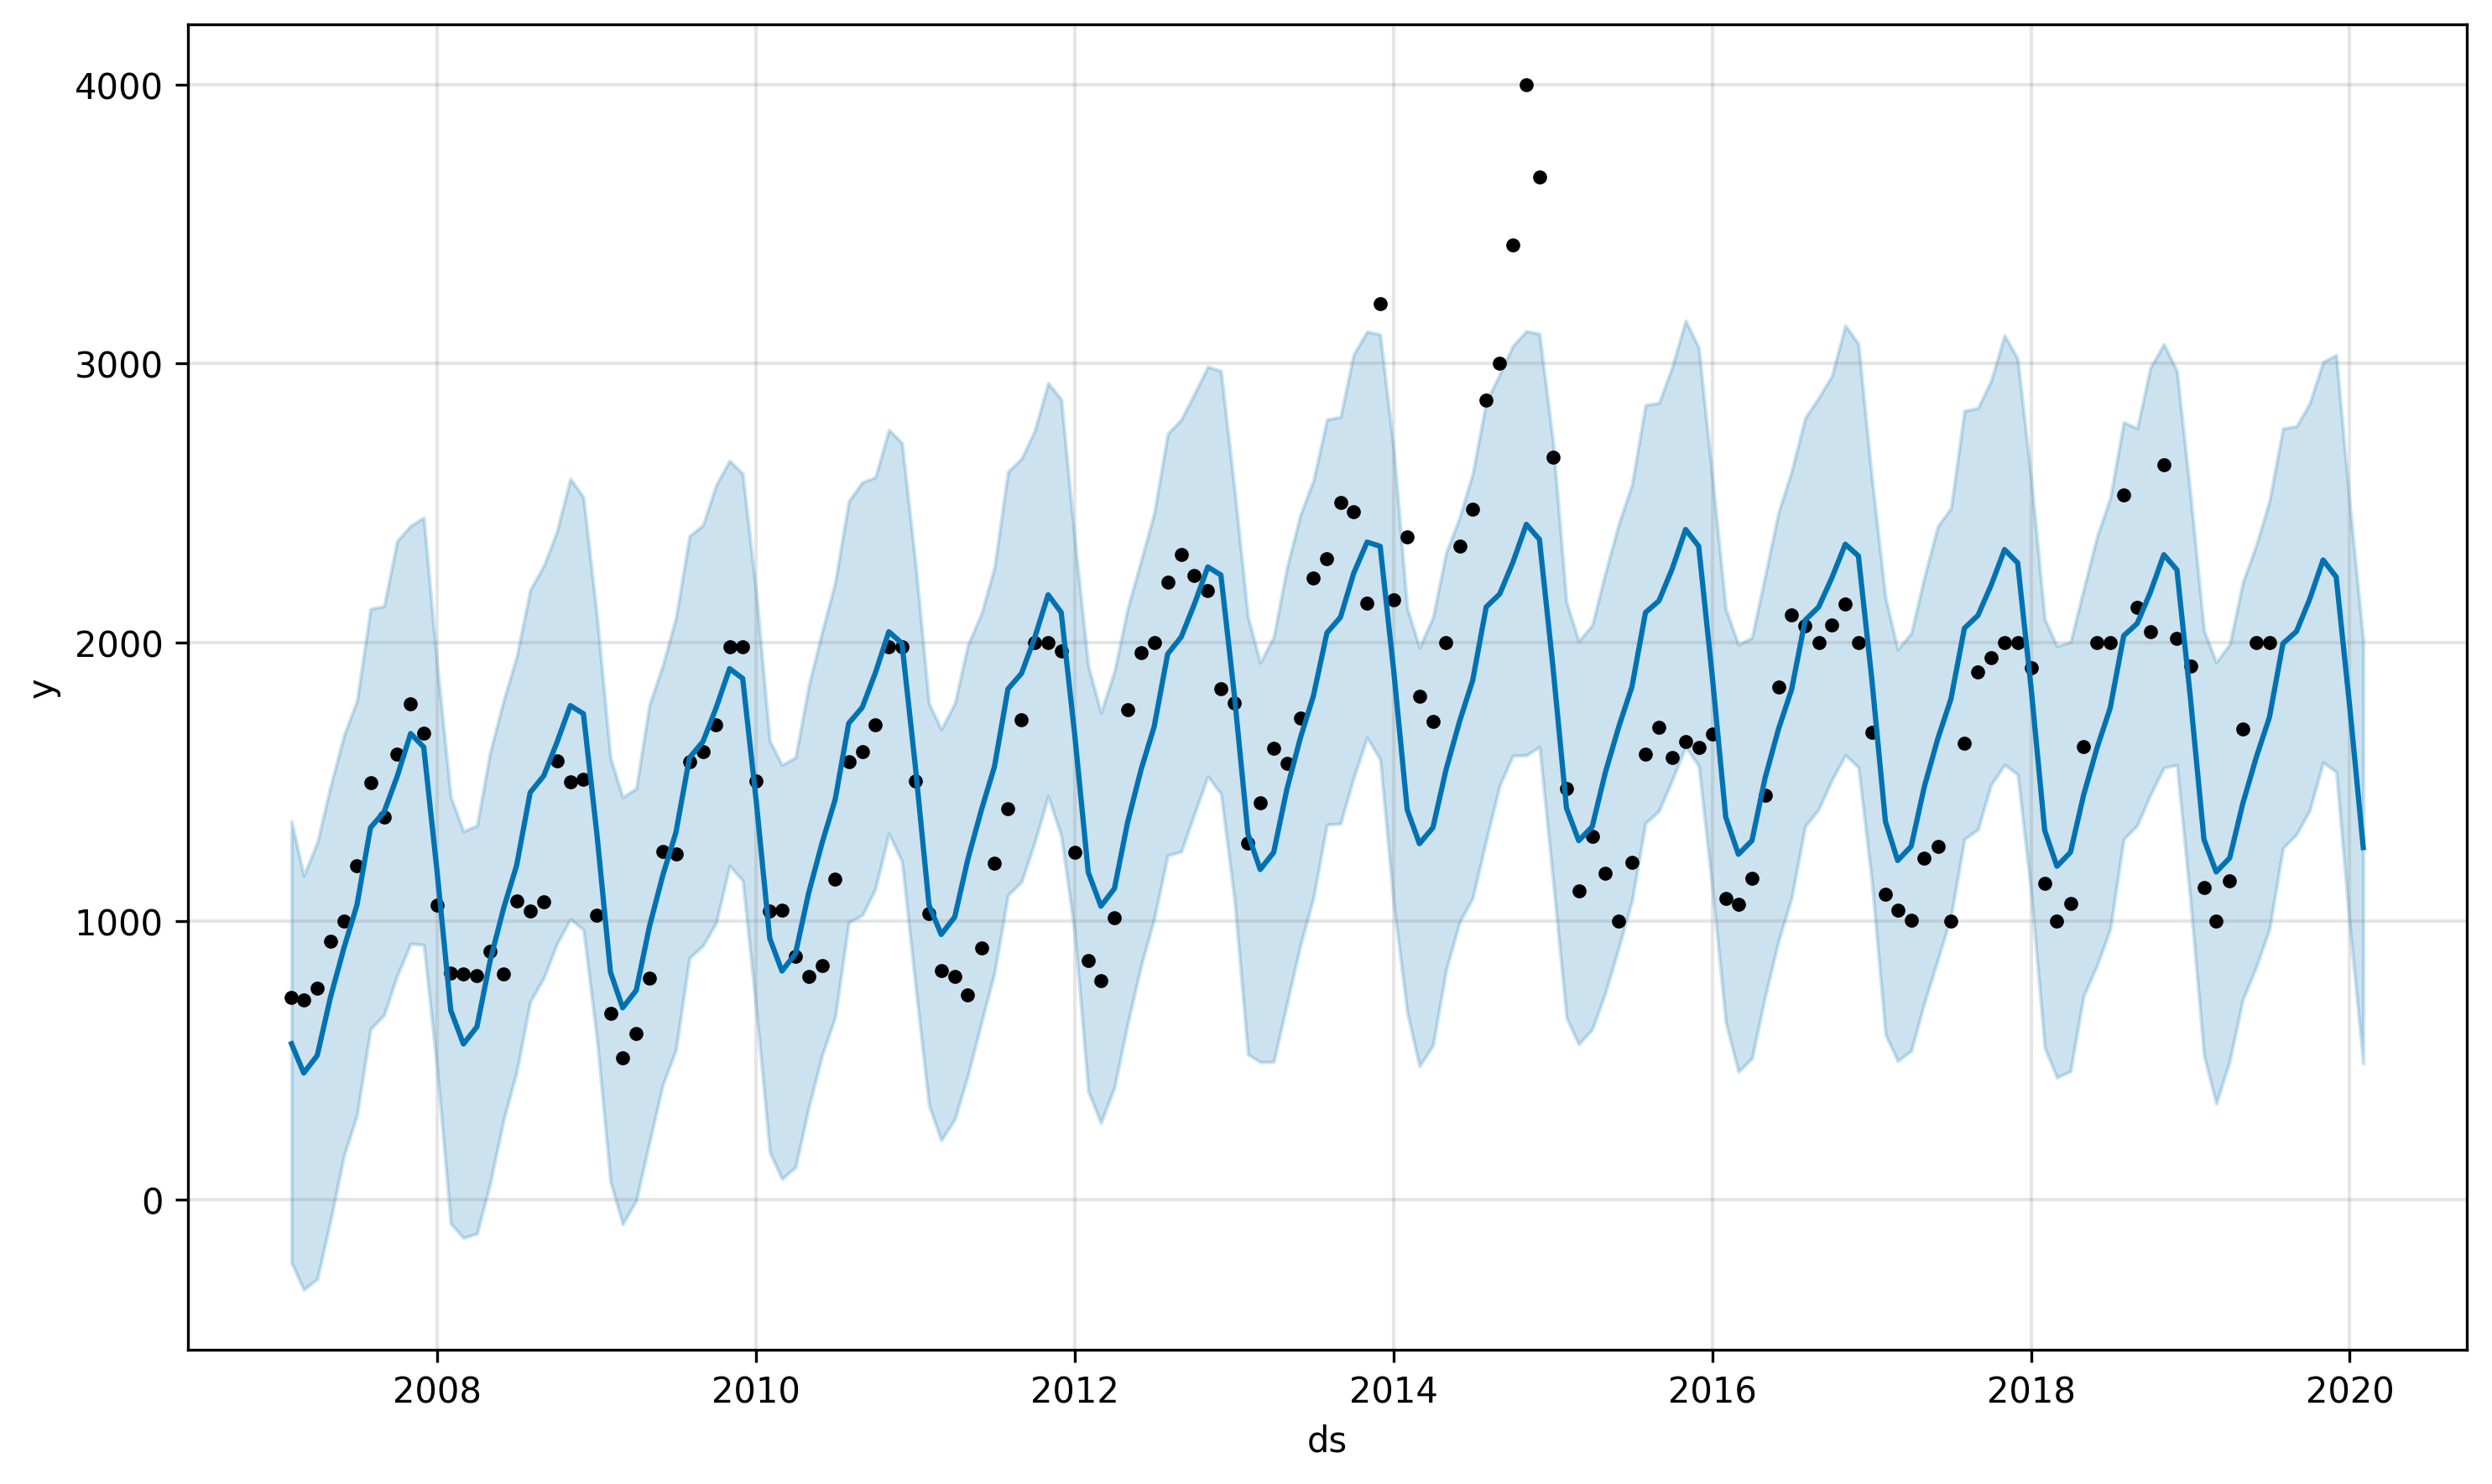

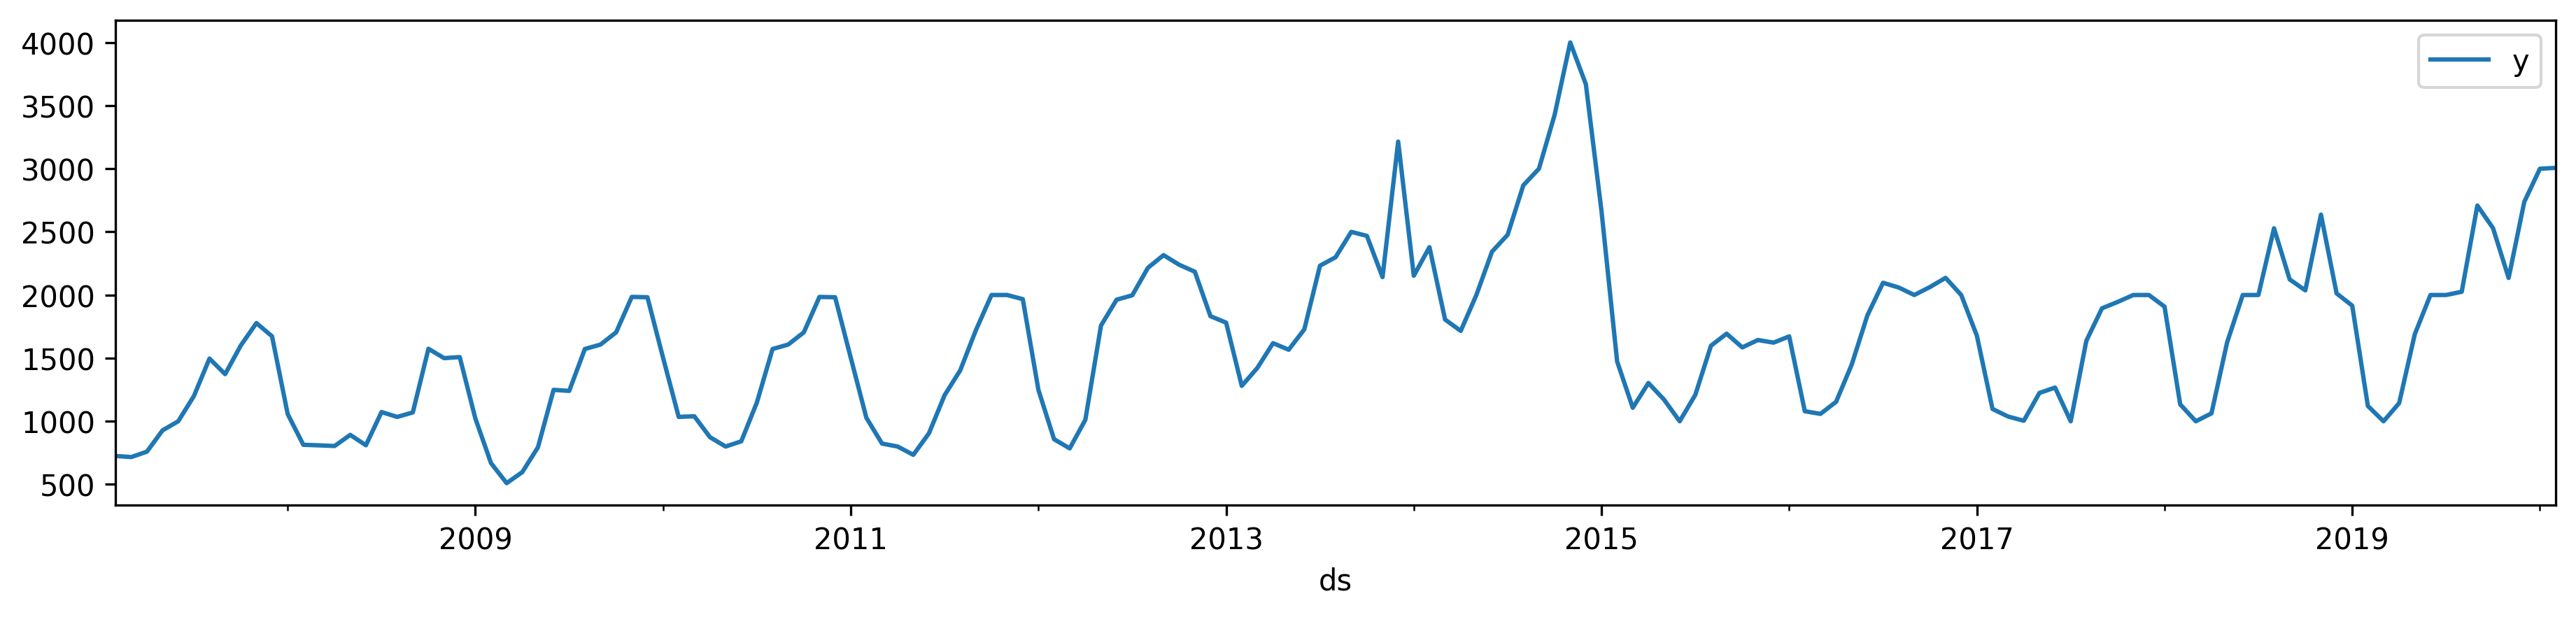

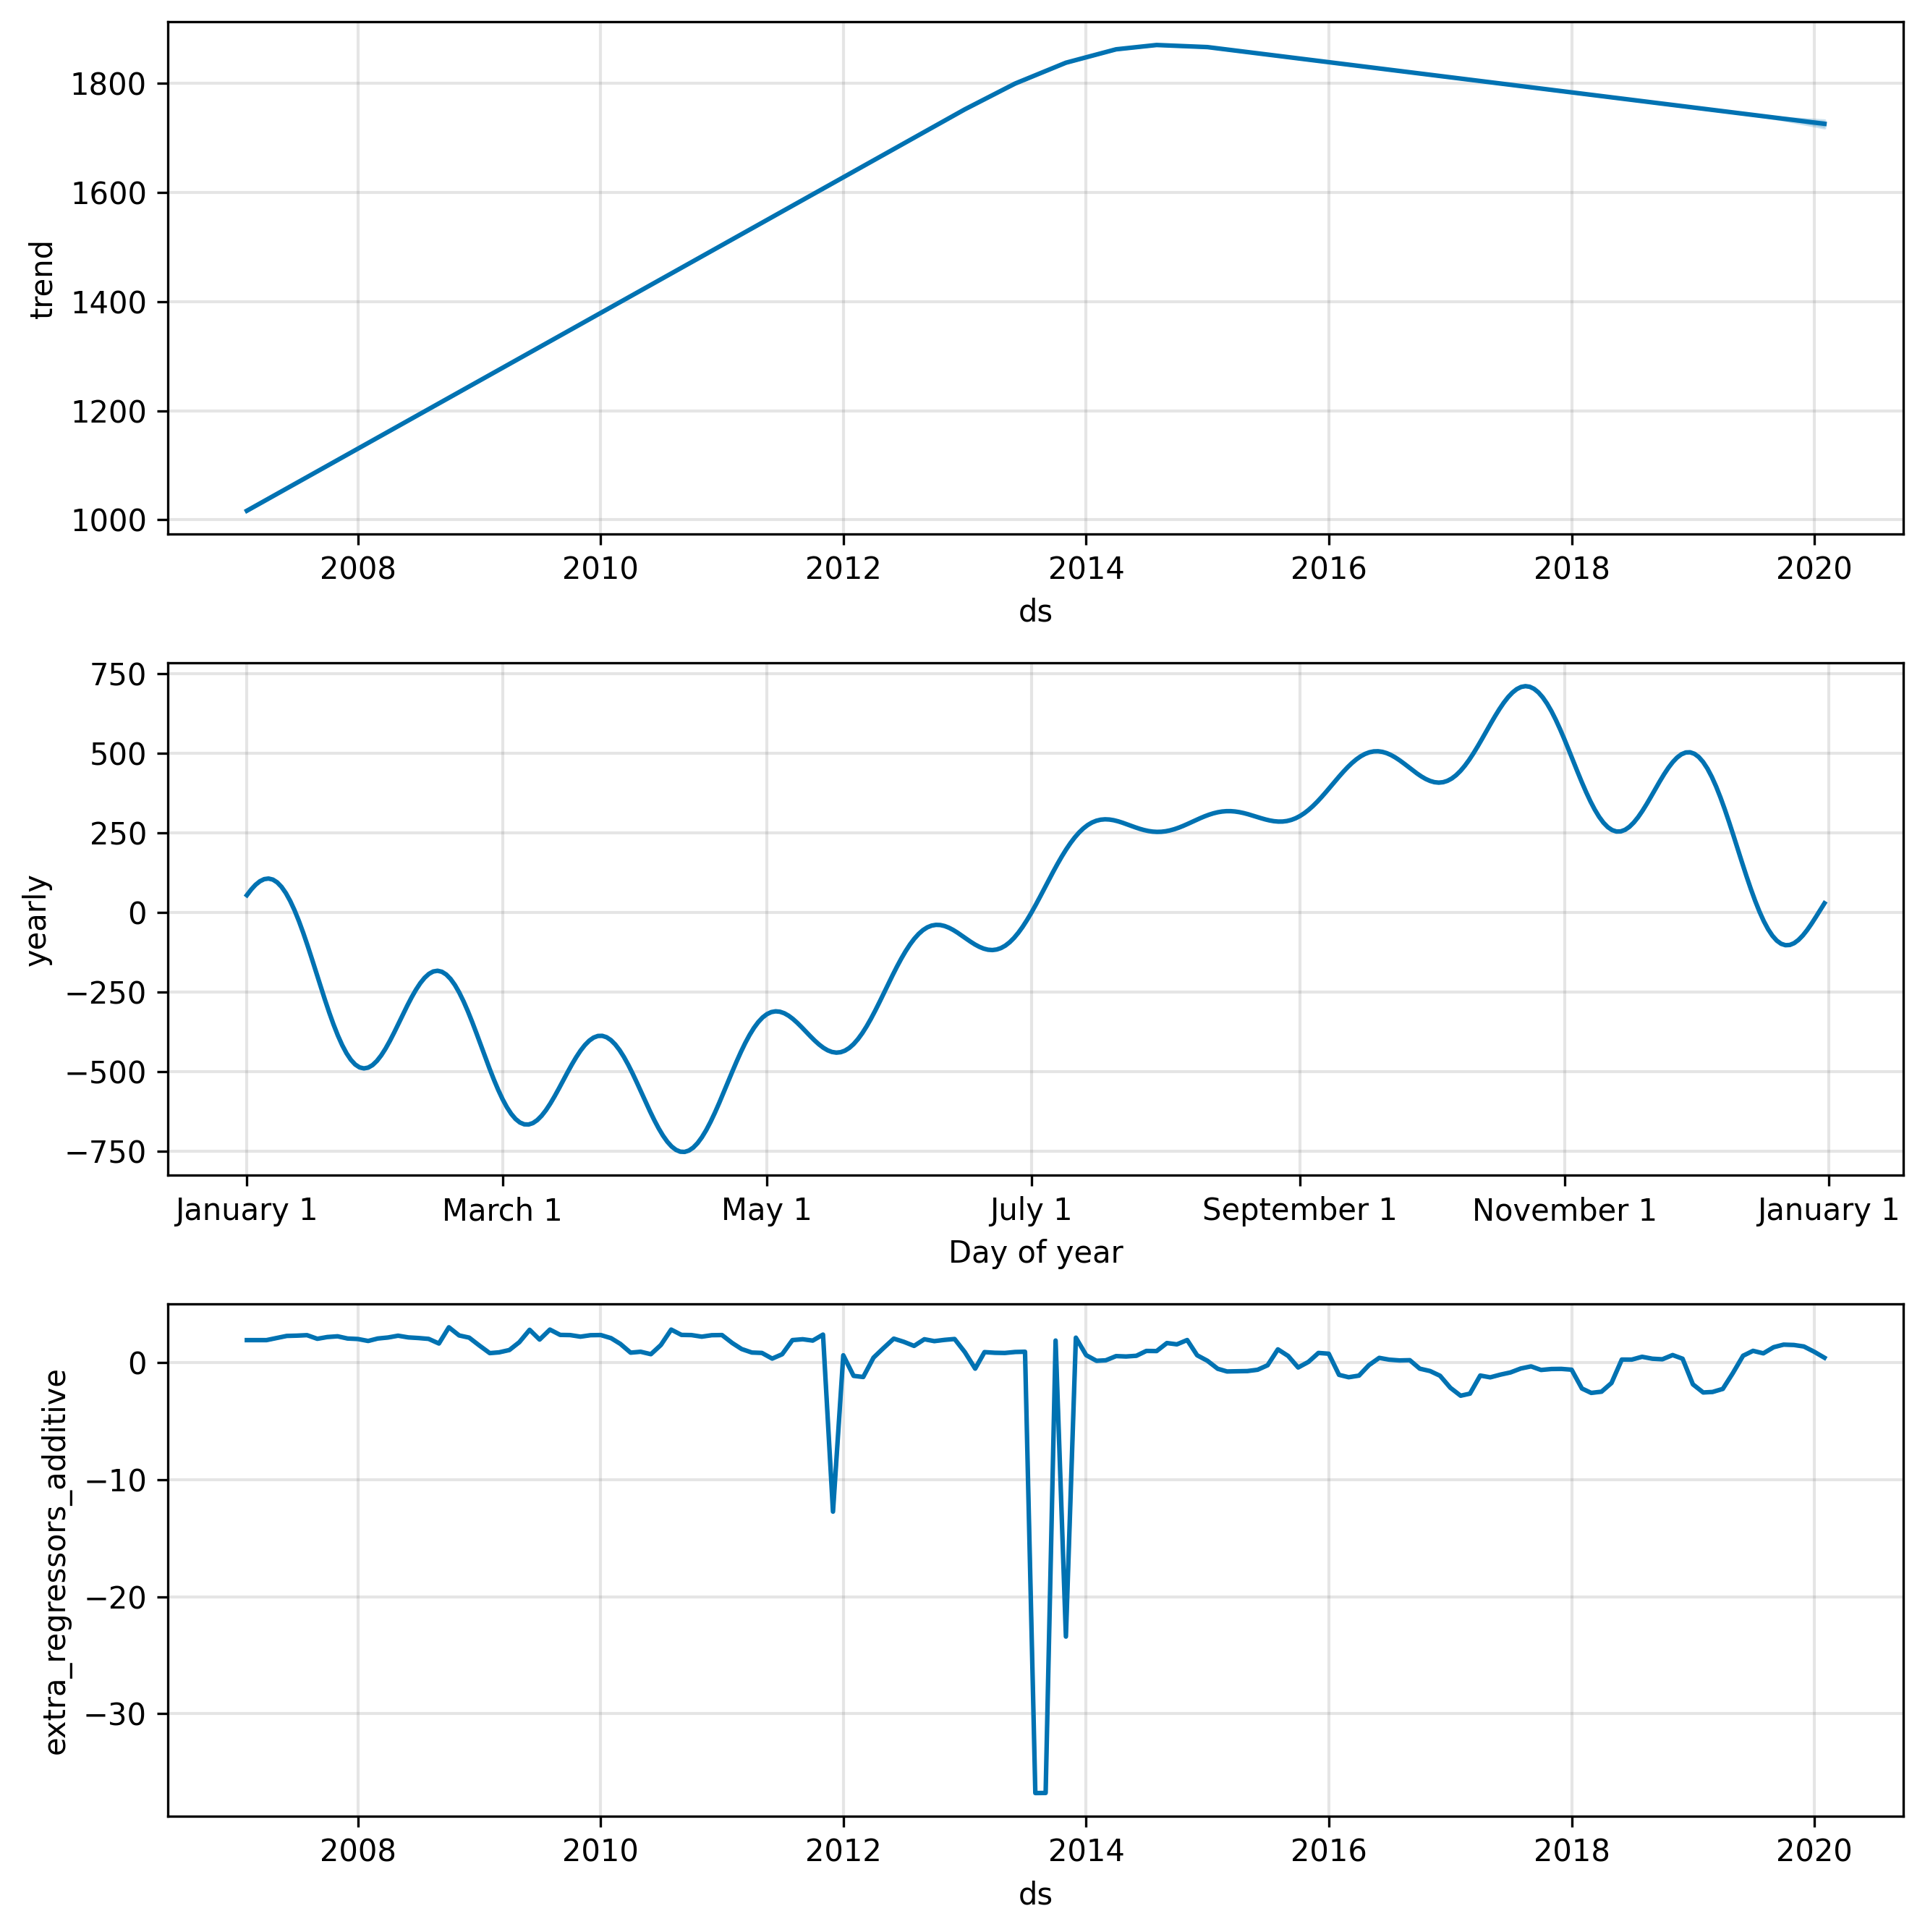

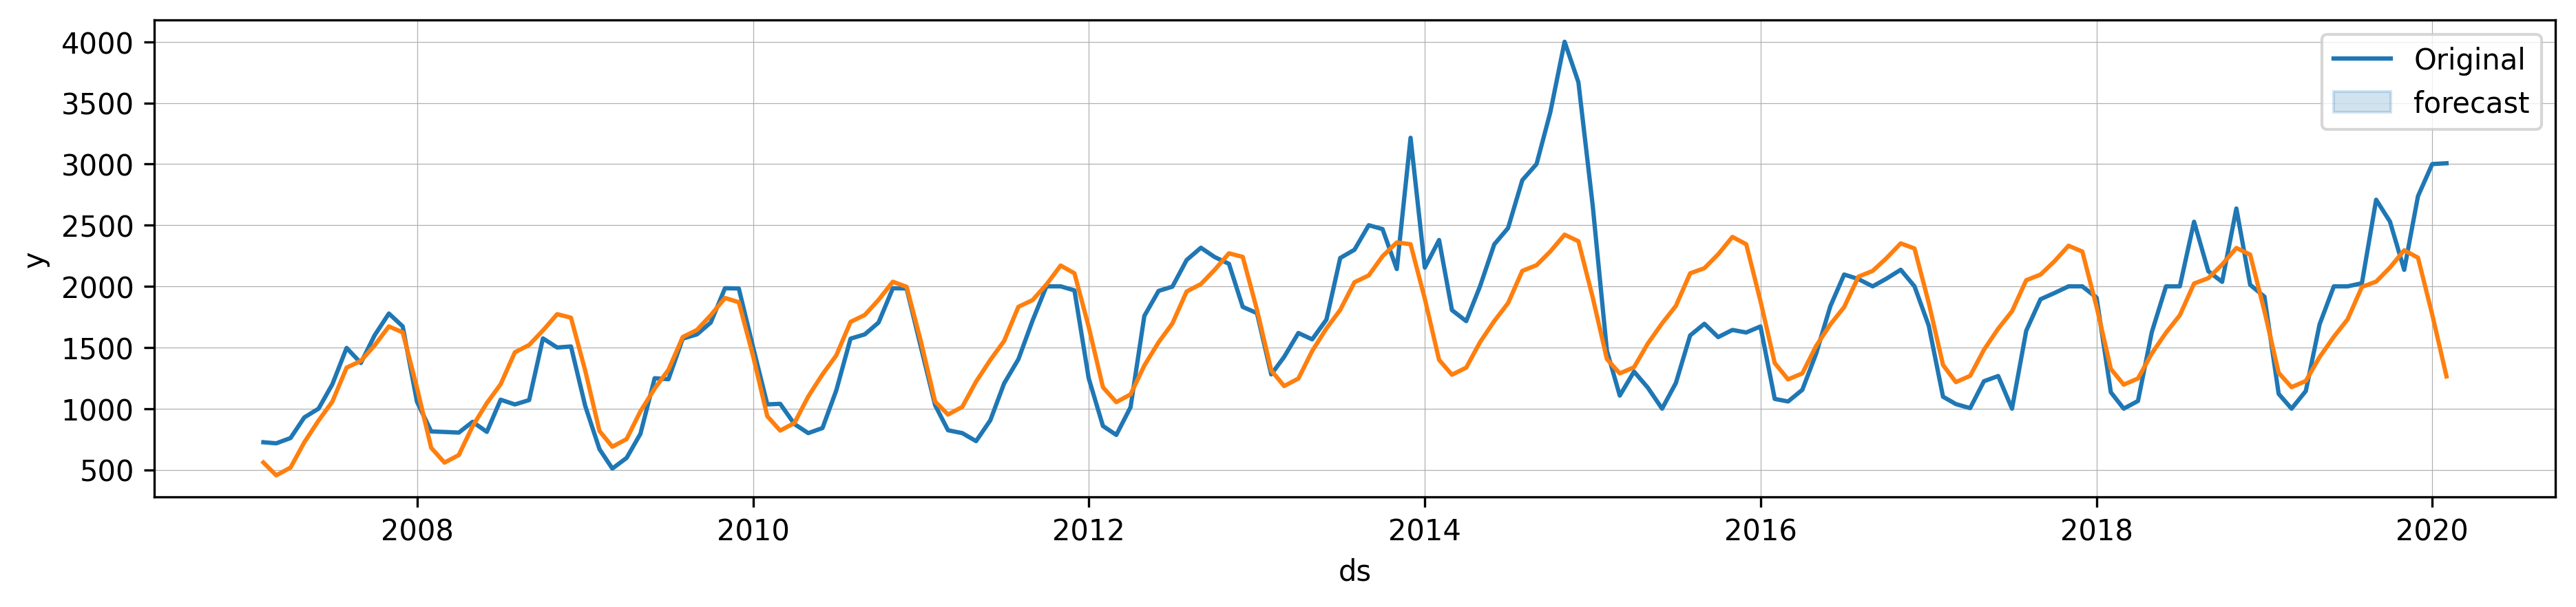

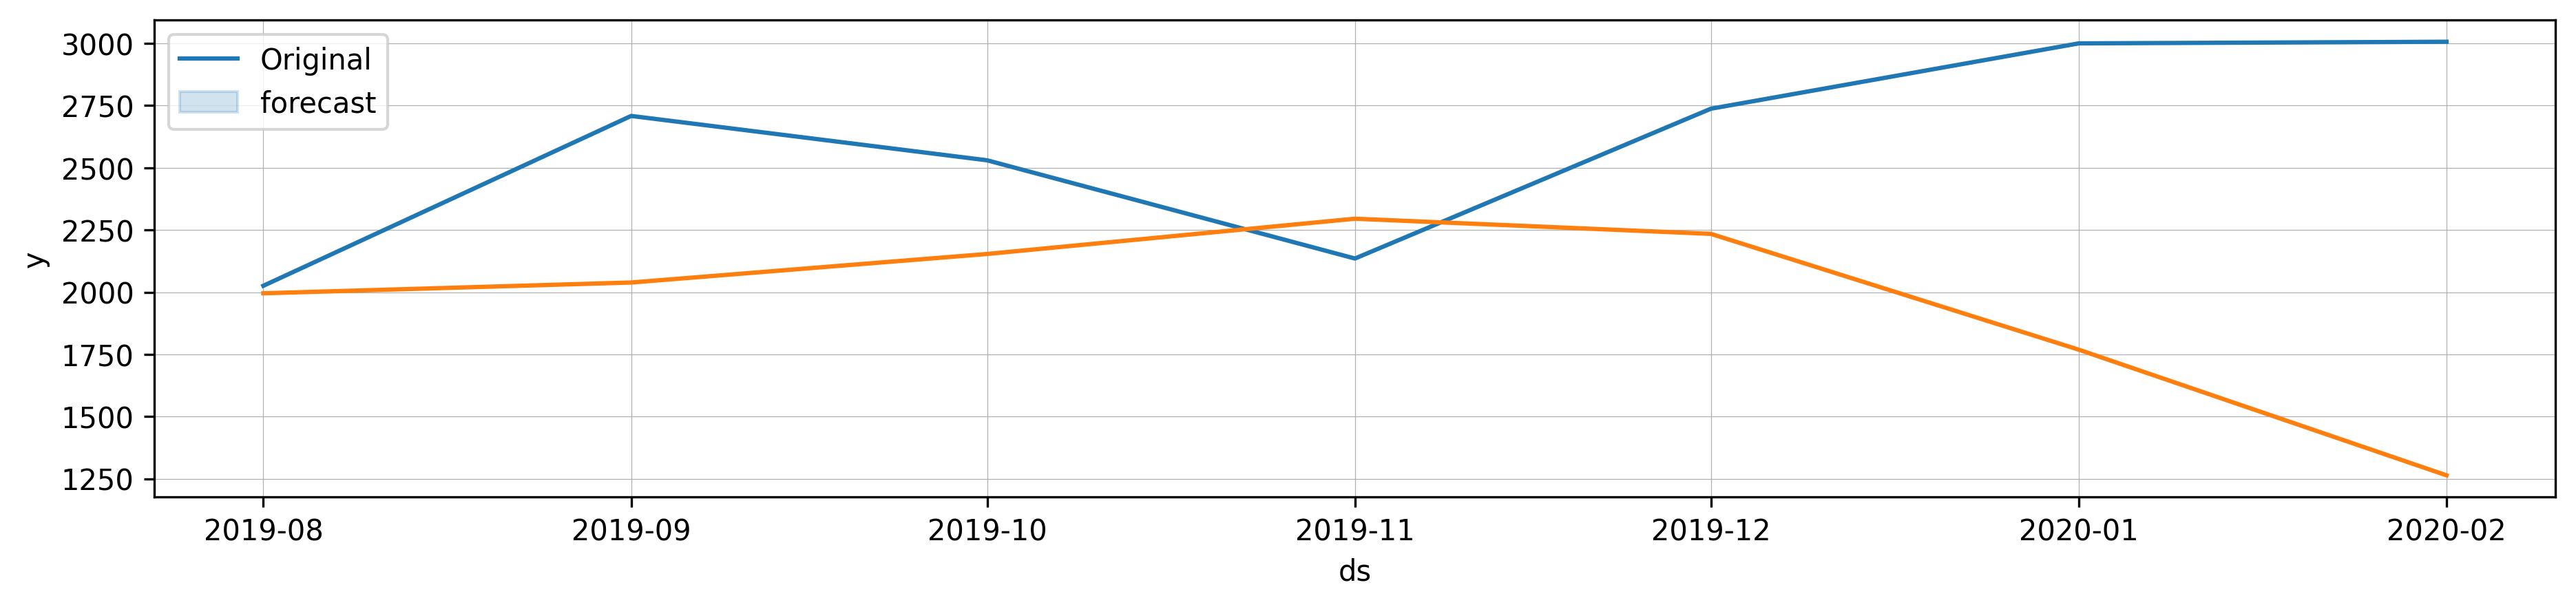

In [ ]:
MAE_Prophet = model_prophet(finaldf)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/lvb5qgxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l0p76h9/tp0fjxcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19414', 'data', 'file=/tmp/tmp3l0p76h9/lvb5qgxk.json', 'init=/tmp/tmp3l0p76h9/tp0fjxcj.json', 'output', 'file=/tmp/tmp3l0p76h9/prophet_model6ah4s1x0/prophet_model-20230711161002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity_mean', 'y', 'ds'], dtype='object')
Prophetdf_test.shape[0]
7
            ds            y
150 2019-08-01  2025.659824
151 2019-09-01  2708.390355
152 2019-10-01  2530.000000
153 2019-11-01  2135.153959
154 2019-12-01  2737.365591
155 2020-01-01  3000.000000
156 2020-02-01  3006.561448
future
            ds  Arrival Quantity_mean
0   2007-02-01             475.929293
1   2007-03-01             750.888889
2   2007-04-01             721.227273
3   2007-05-01             690.472727
4   2007-06-01             657.957071
..         ...                    ...
152 2019-10-01             764.845238
153 2019-11-01             780.264515
154 2019-12-01             803.155147
155 2020-01-01             850.850000
156 2020-02-01             969.248397

[157 rows x 2 columns]
            ds         yhat   yhat_lower   yhat_upper
152 2019-10-01  2180.619082  1440.180259  2849.656531
153 2019-11-01  2345.555540  1607.288417  3030.877940
154 2019-12-01  2273.350636  1529.509770 

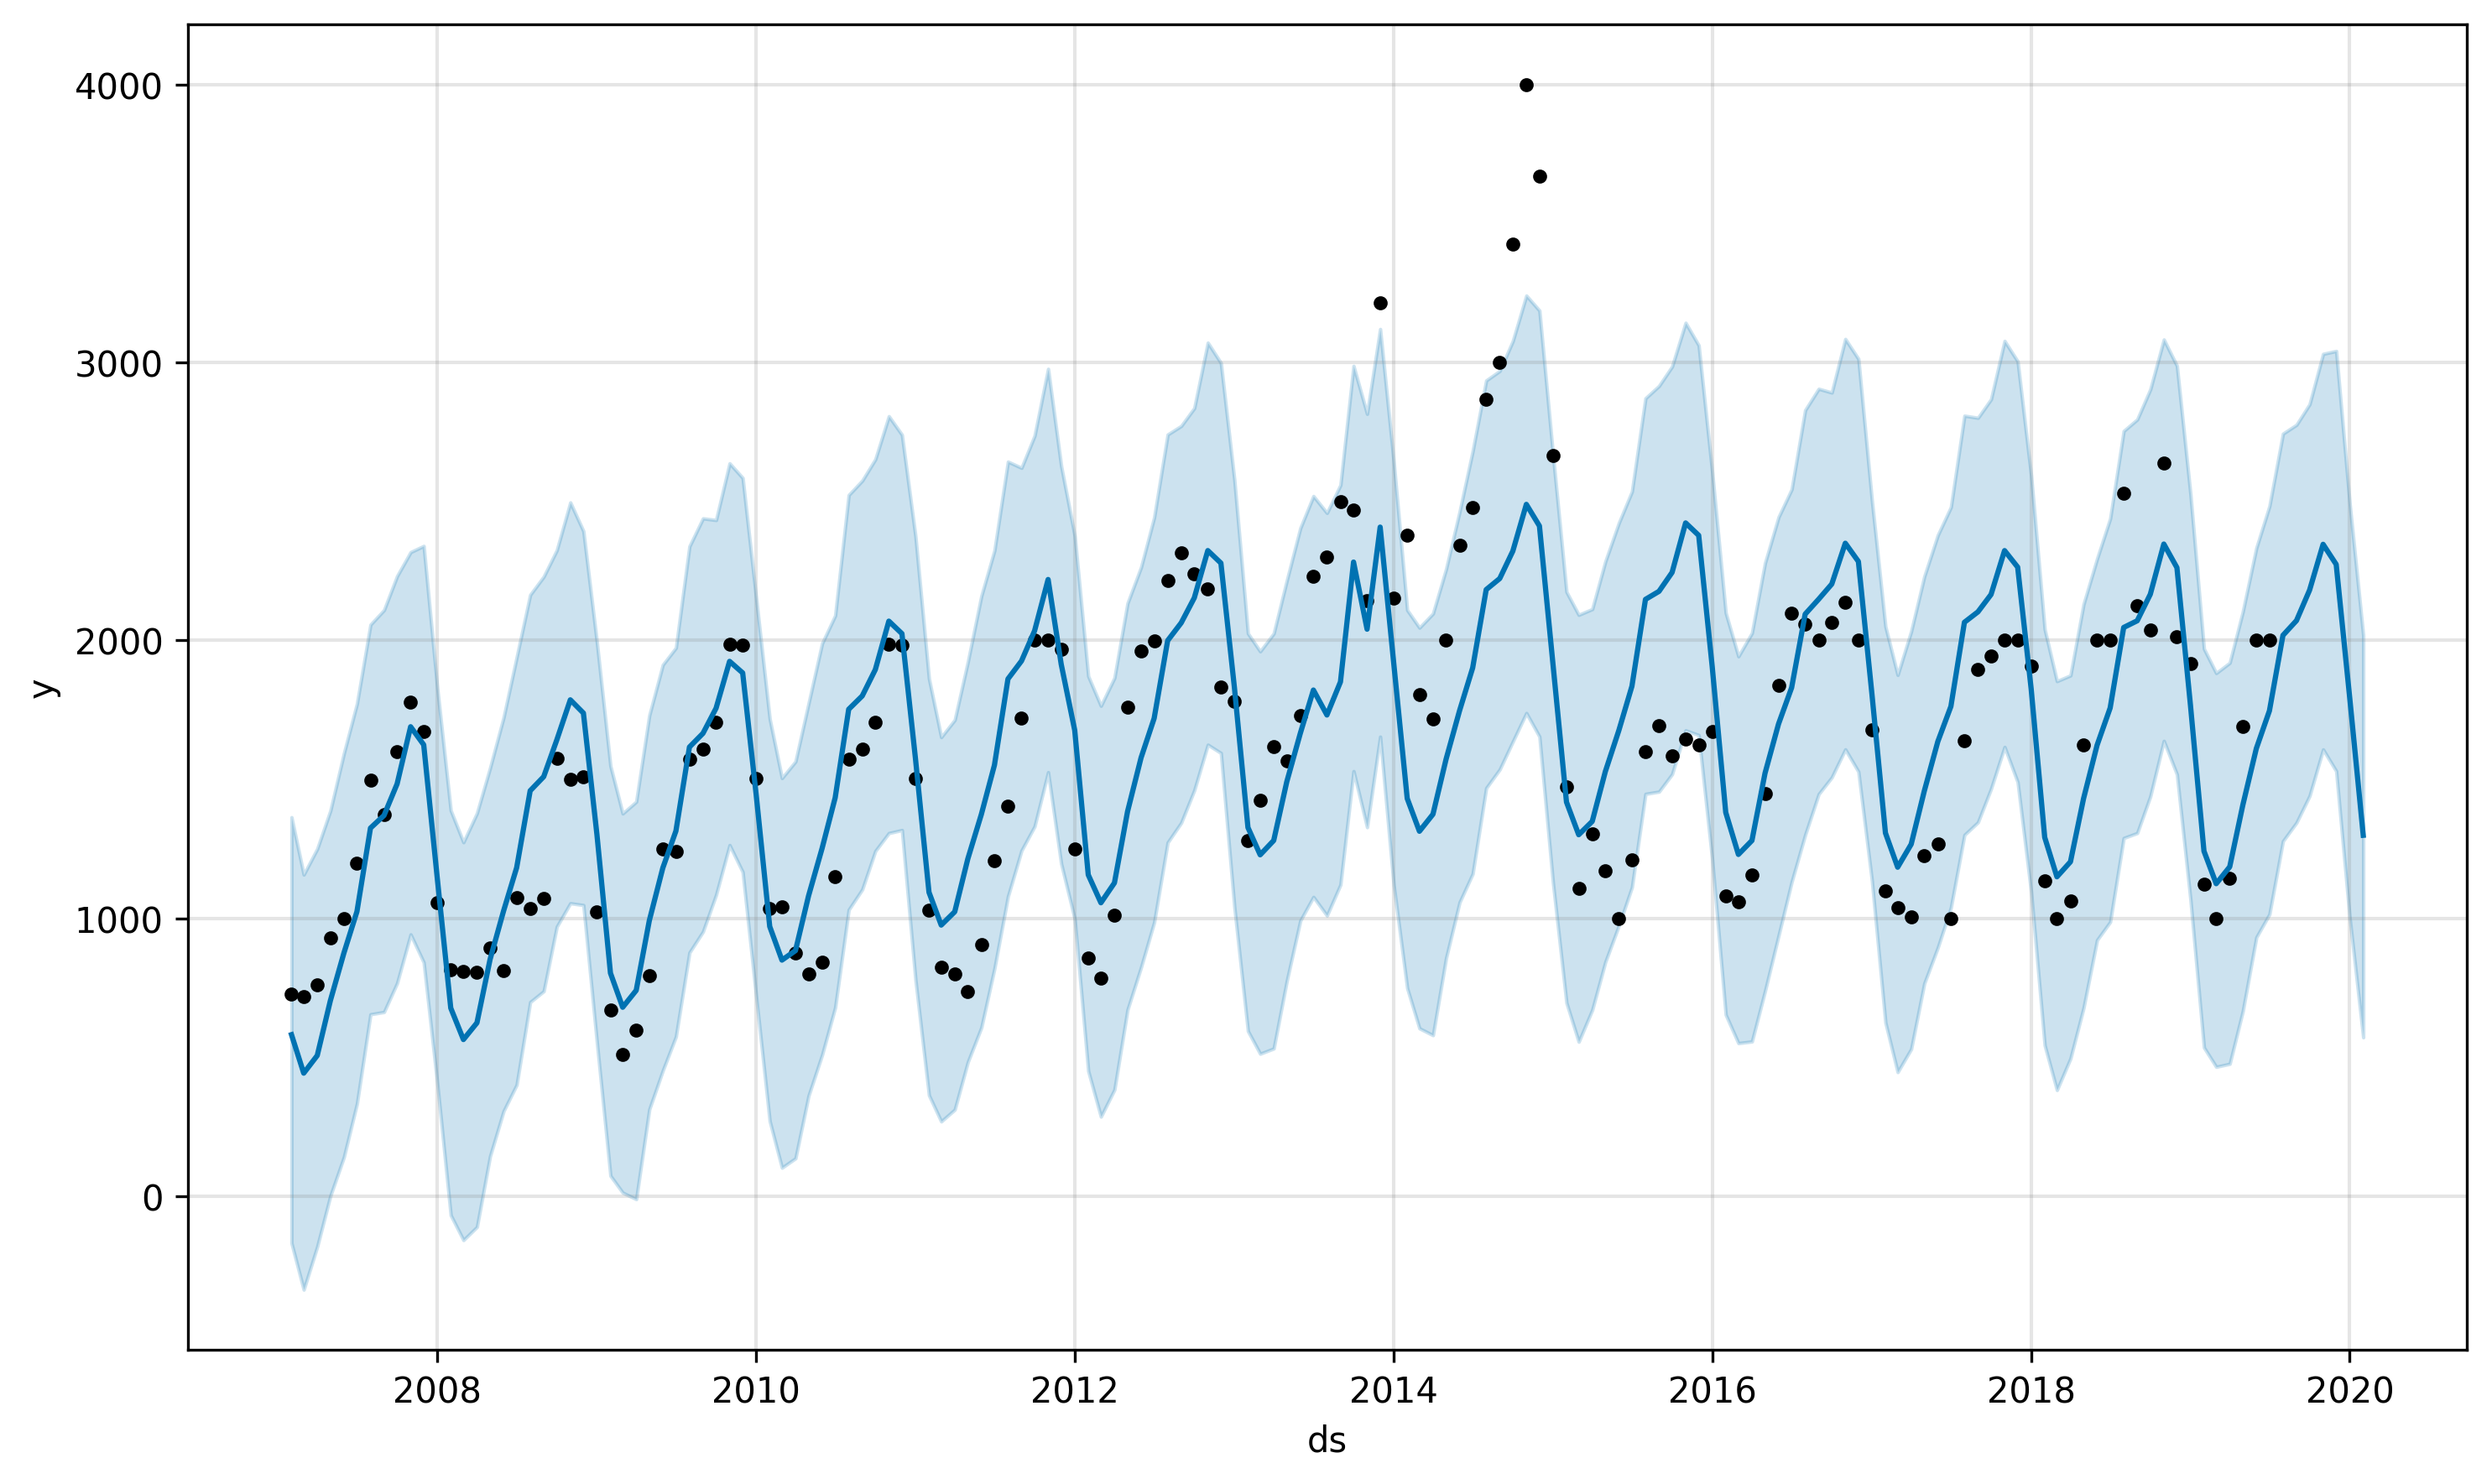

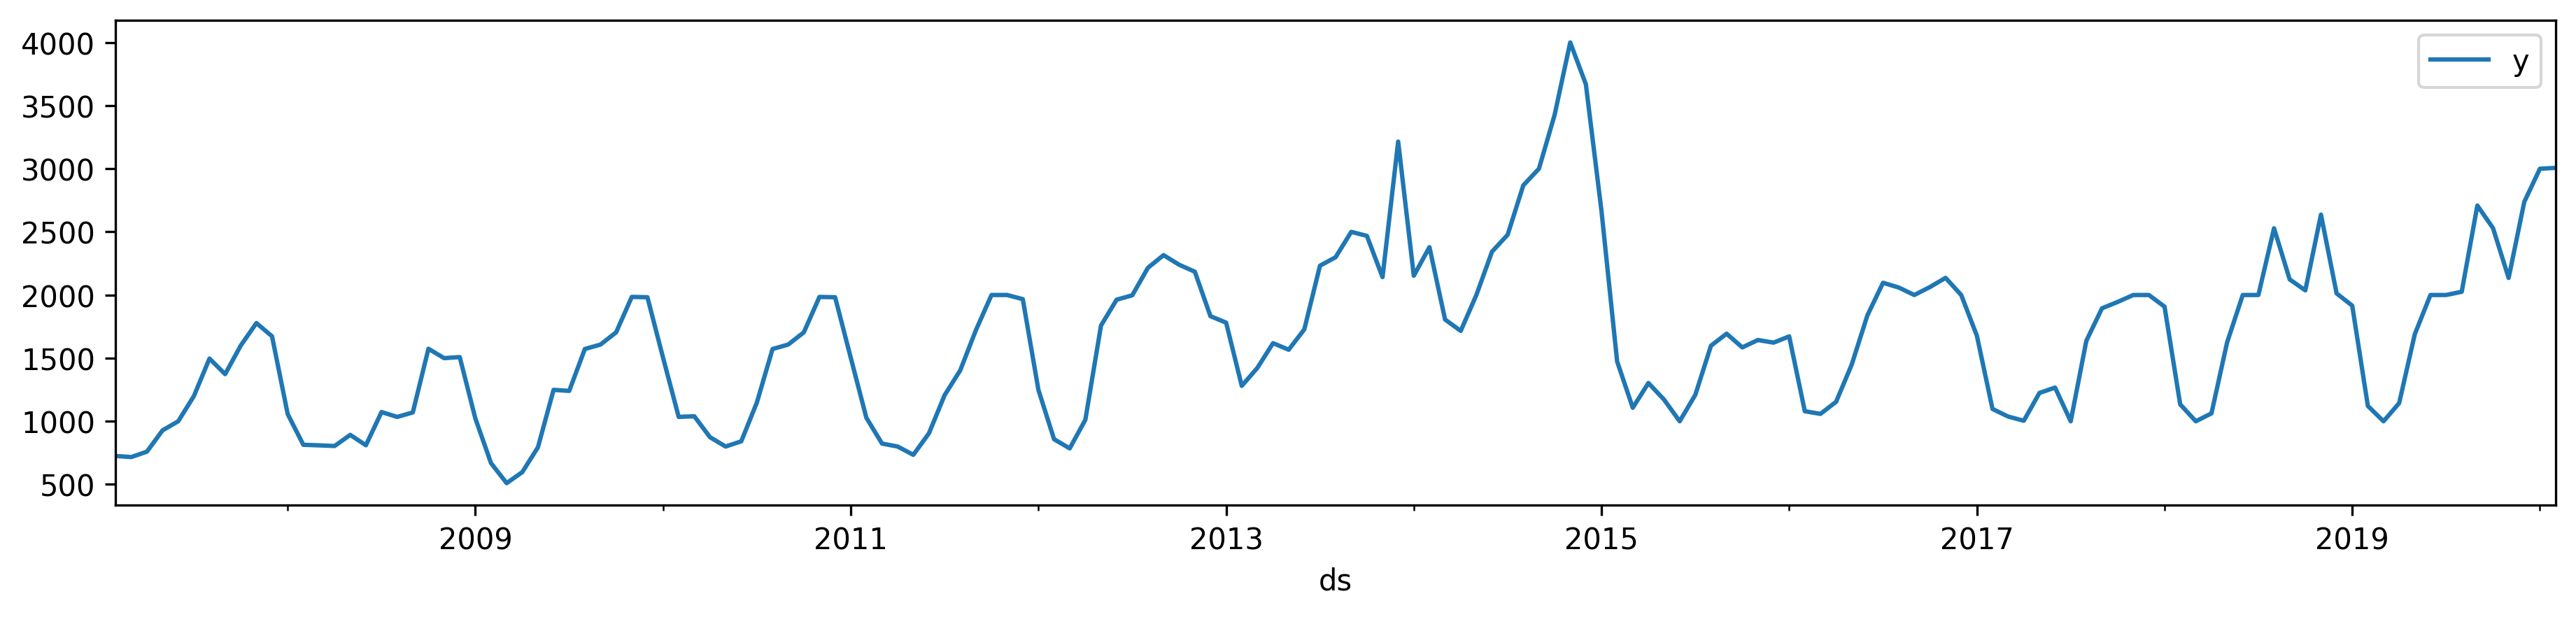

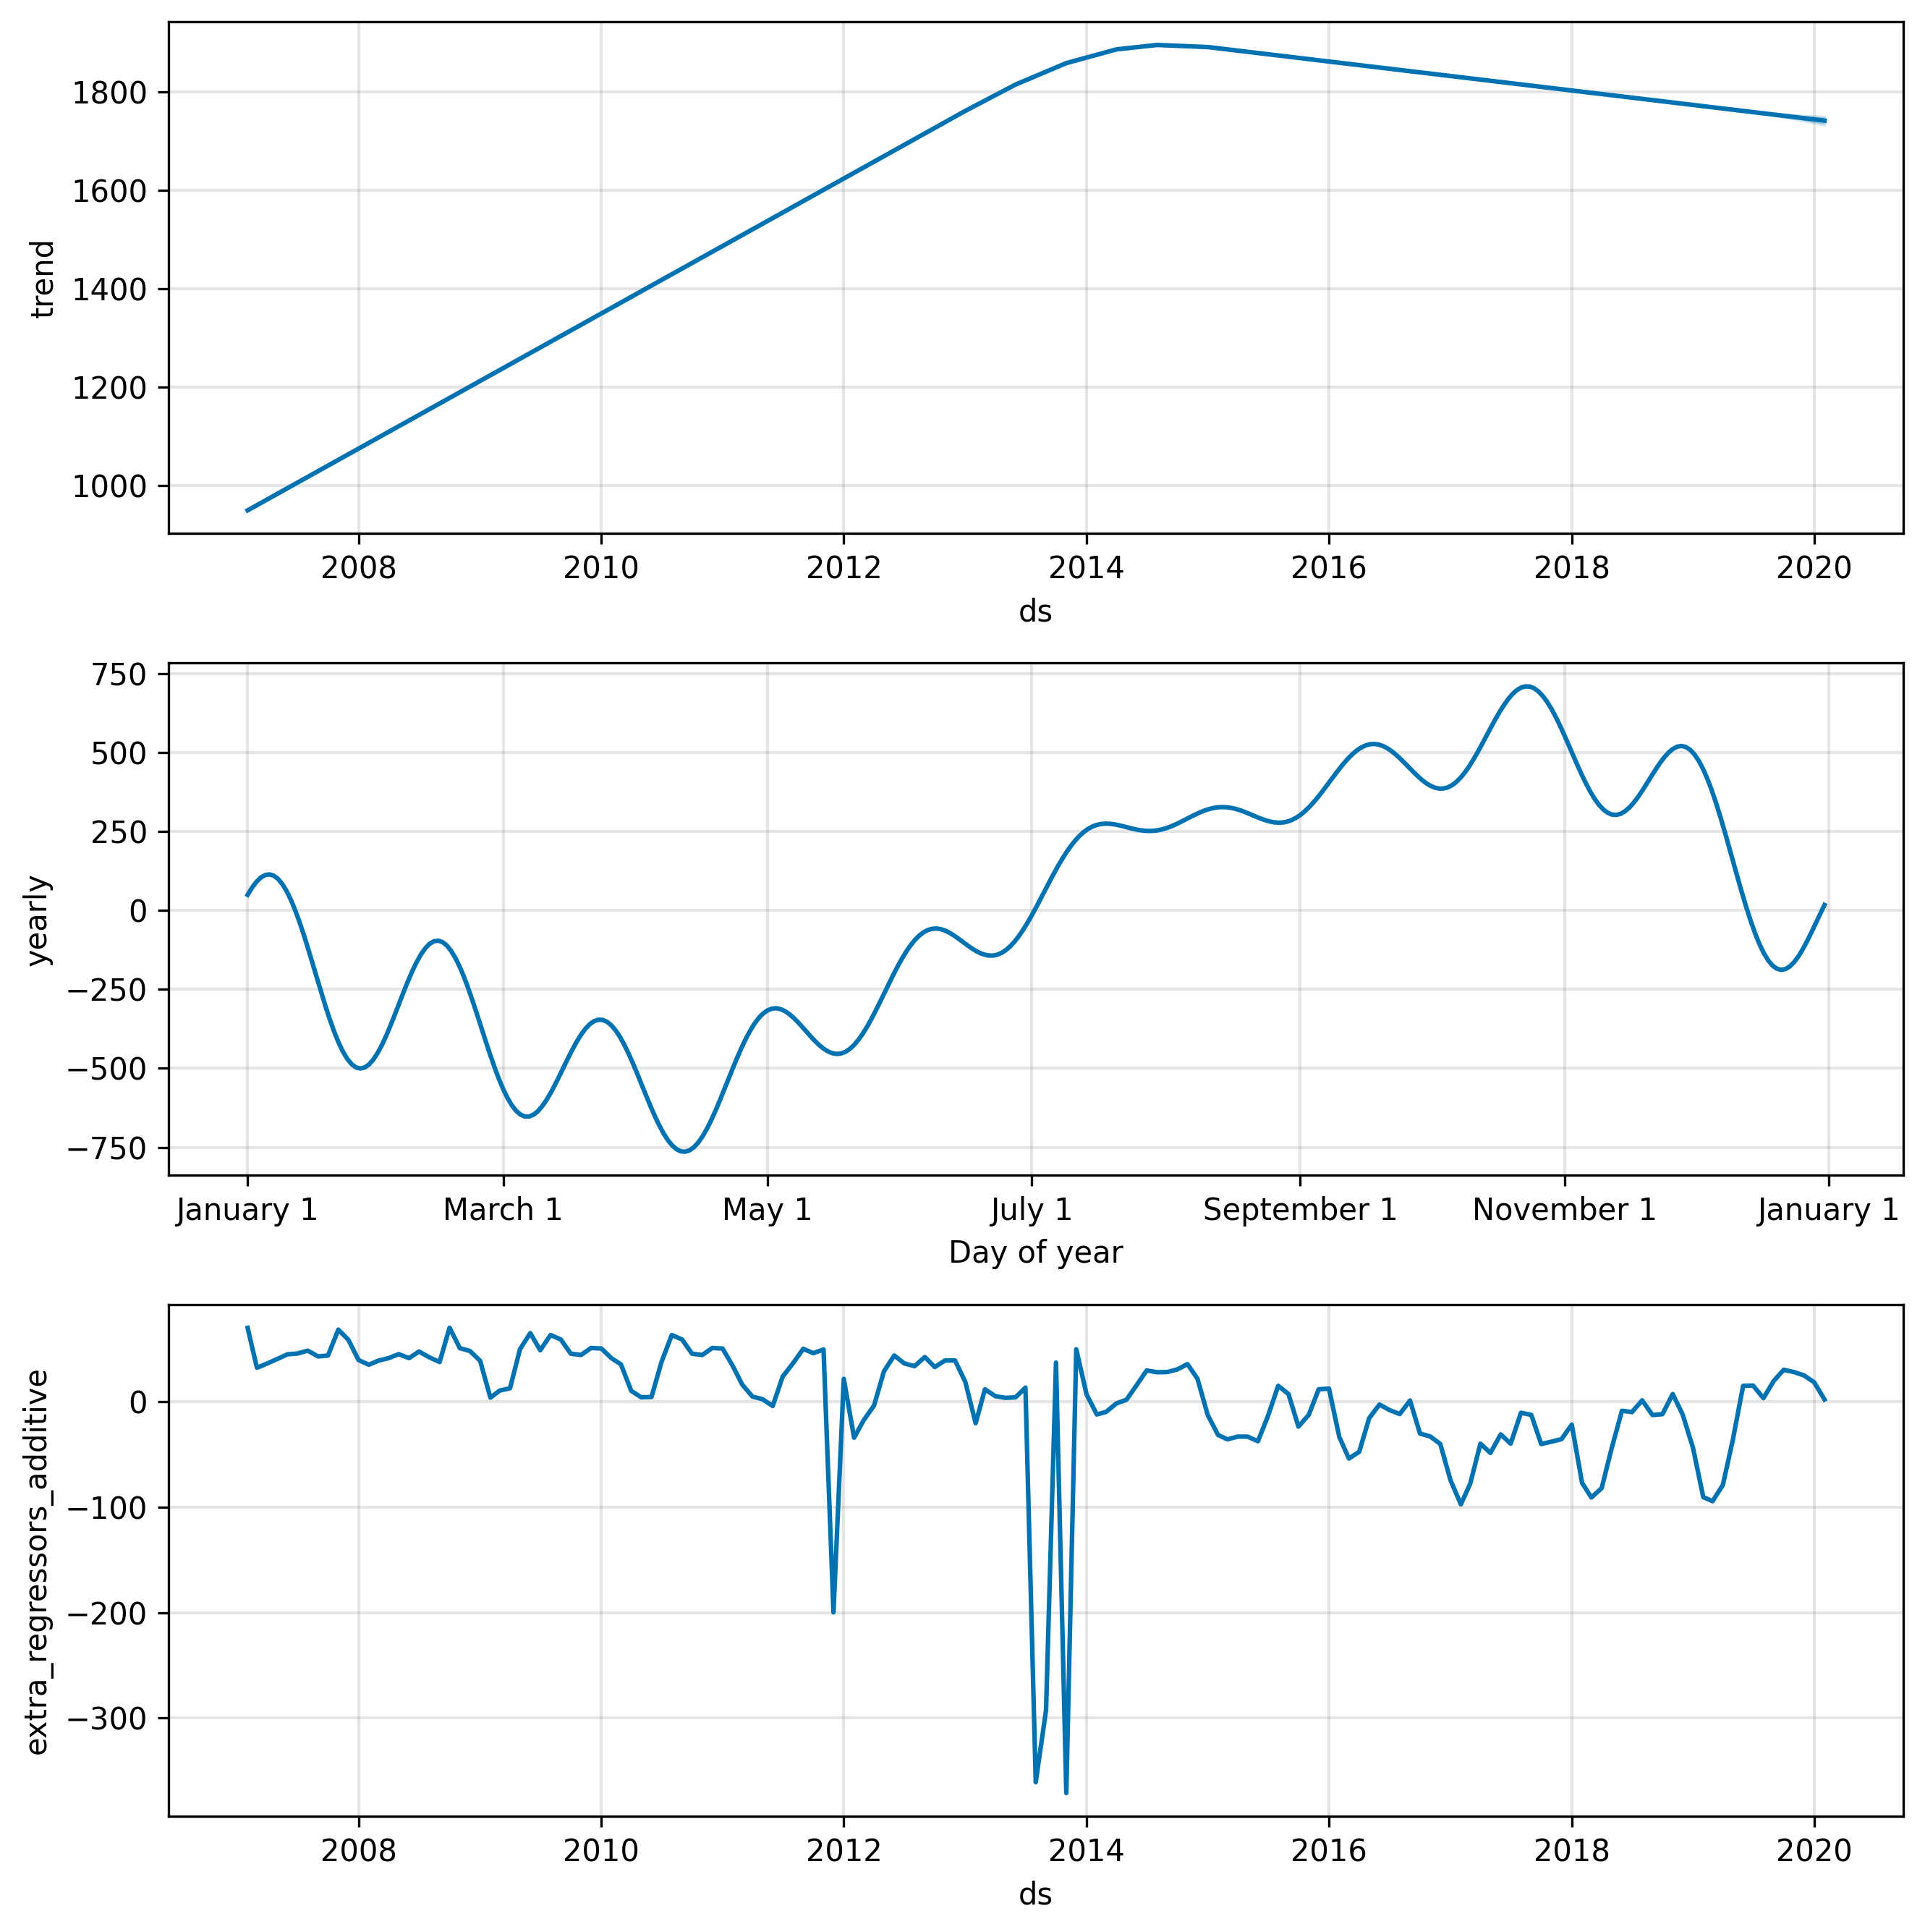

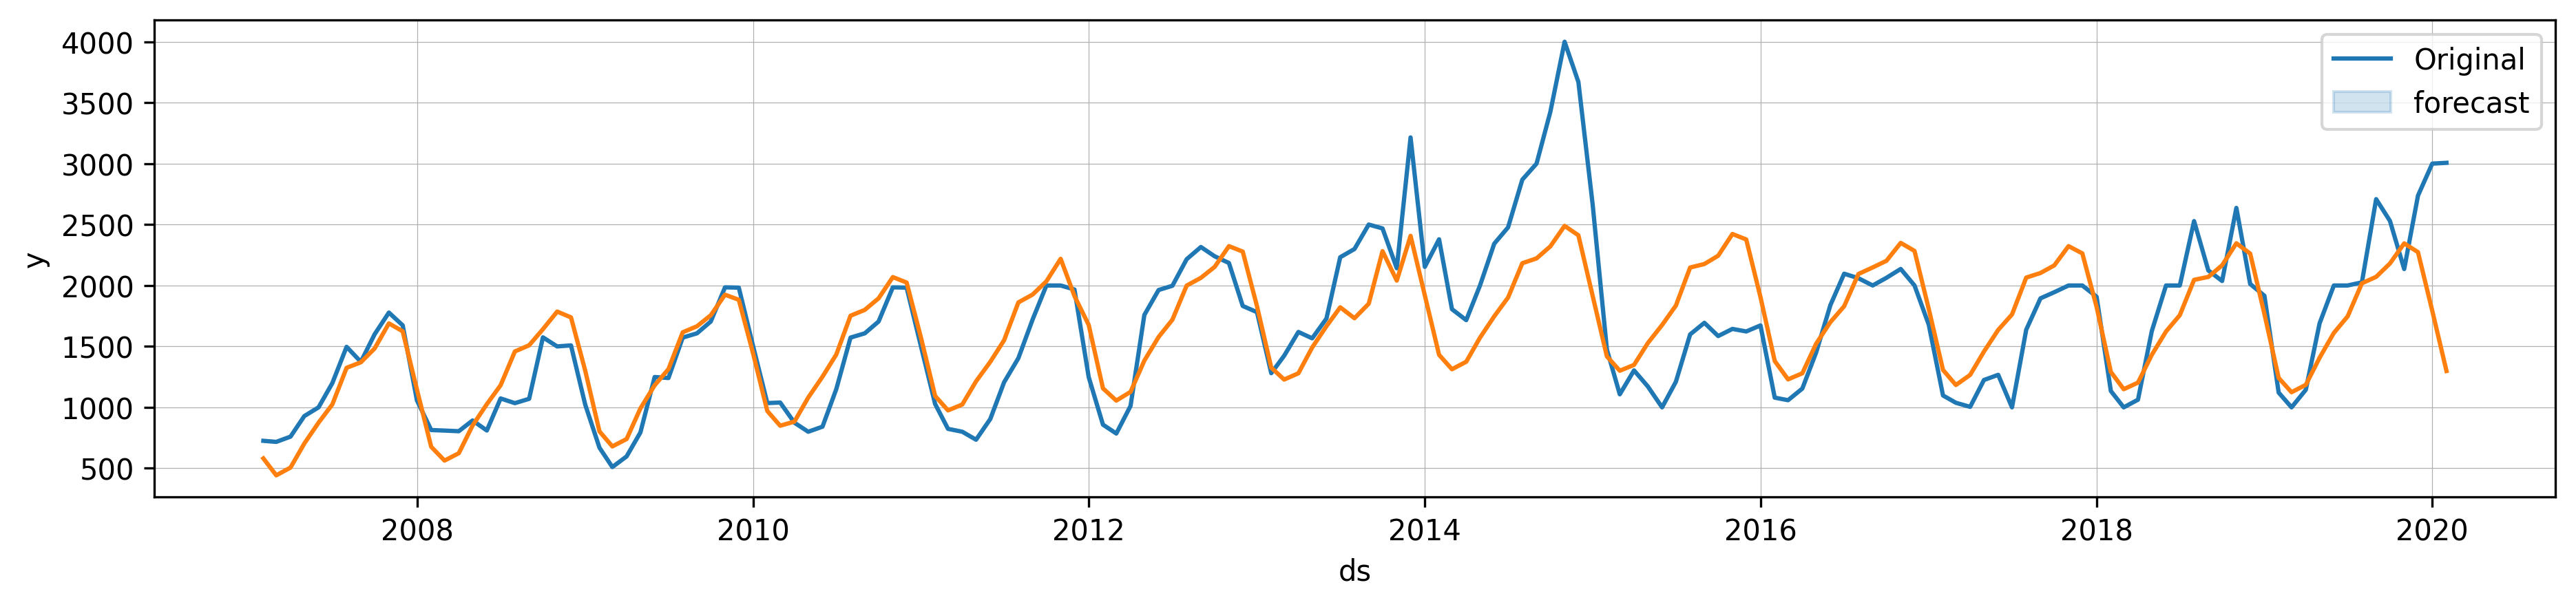

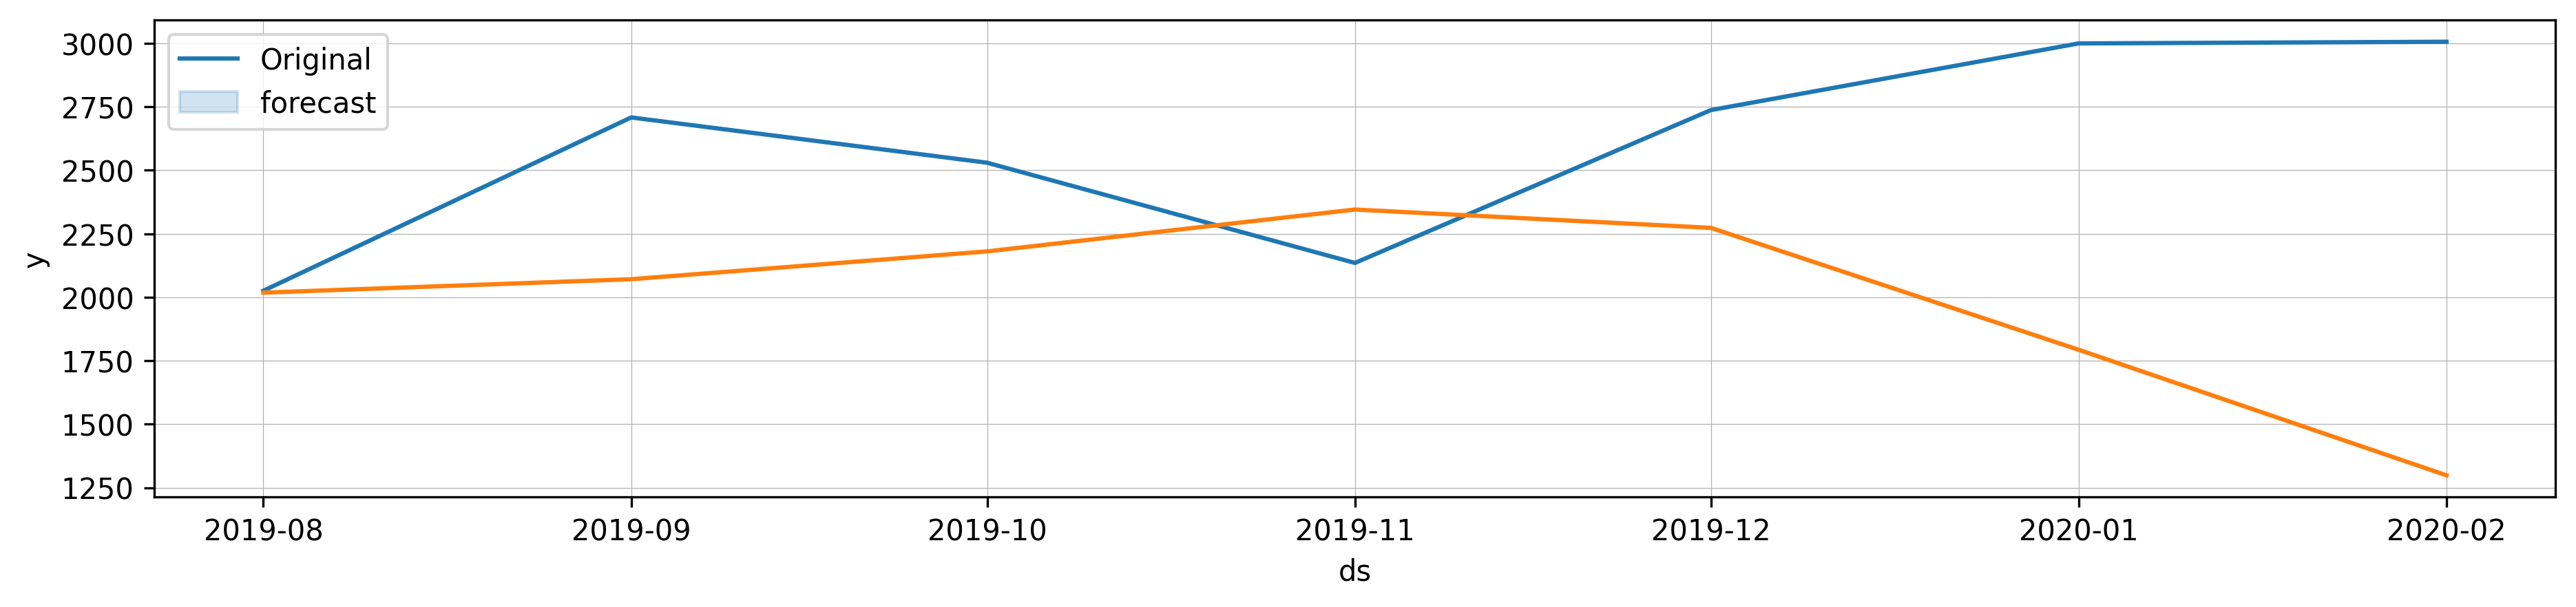

In [ ]:
MAE_Prophet_1=model_prophet(finaldf1)
